# TELECOM CHURN CASE STUDY - by  Sravanya and Madhudeepa 

## Introduction

The problem statement for this case study involves a telecom churn company that would like to prevent it's customers from churning by identifying features that could help them identify potential churners and a model that can predict the same. To solve this problem 3 different classification models were experimented with to find the model that gives the best recall (i.e highest sensitivity) as the cost of false negatives i.e. predicting actual churned customers as non churn is more in this scenario than others. 

#### Importing required libraries

In [482]:
#Supress warning
import warnings
warnings.filterwarnings('ignore')

#import pandas
import pandas as pd
#import numpy
import numpy as np
#import matplotlib for plotting data
import matplotlib.pyplot as plt
#import seaborn
import seaborn as sns

#max rows and columns to be displayed after executing a cell
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Step 1 : Read and Understand data

In [483]:
#Read data 
#Note: Csv file is kept in the current directory
teleChurn = pd.read_csv('telecom_churn_data.csv')
teleChurn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [484]:
#Number of rows and columns
teleChurn.shape

(99999, 226)

Dataframe has 99999 rows and 226 columns

In [485]:
#Statistics
teleChurn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

From the above results we can understand the following, 

- Some of the columns have a single value throughout.These can be dropped later. 
- The columns 'arpu_6','arpu_7' and 'arpu_8' (which stands for average revenue per user) have minimum values in the negative range indicating a loss for the company in case of some customers. These will be looked into detail in the EDA part of the case study. 
- Many columns seem to have outliers. These will be looked into detail in the outlier treatment section of this case study.

Few columns have single value. These can be dropped later.

In [486]:
#Column information
teleChurn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

## Step2: Data Cleaning

### Step 2.1: Missing values treatment

In [487]:
#Check % of missing values
missingCol = (teleChurn.isnull().sum()*100/teleChurn.shape[0]).sort_values(ascending=False)
missingCol

count_rech_2g_6             74.846748
date_of_last_rech_data_6    74.846748
count_rech_3g_6             74.846748
av_rech_amt_data_6          74.846748
max_rech_data_6             74.846748
total_rech_data_6           74.846748
arpu_3g_6                   74.846748
arpu_2g_6                   74.846748
night_pck_user_6            74.846748
fb_user_6                   74.846748
arpu_3g_7                   74.428744
count_rech_2g_7             74.428744
fb_user_7                   74.428744
count_rech_3g_7             74.428744
arpu_2g_7                   74.428744
av_rech_amt_data_7          74.428744
max_rech_data_7             74.428744
night_pck_user_7            74.428744
total_rech_data_7           74.428744
date_of_last_rech_data_7    74.428744
night_pck_user_9            74.077741
date_of_last_rech_data_9    74.077741
fb_user_9                   74.077741
arpu_2g_9                   74.077741
max_rech_data_9             74.077741
arpu_3g_9                   74.077741
total_rech_d

- There are many columns which have missing values greater than 50%. 
- Few of these columns seem to be important in determining High value customers, We can impute NaN of these columns with 0.<br> - Rest of the columns having missing value more than 50% can be dropped.<br> 
- For columns having less than 50% missing values, we can impute it with relevent data
- Impute with median (for Numeric data) and mode(categorical data)

In [488]:
#Important Columns having more than 50% missing values can be imputed with 0.
highMisingValueCols = ['av_rech_amt_data', 'arpu_2g', 'arpu_3g', 'count_rech_2g', 'count_rech_3g',
                       'max_rech_data', 'total_rech_data','fb_user','night_pck_user']

for col in [y + s for s in ['_6','_7','_8','_9'] for y in highMisingValueCols]:
        teleChurn[col].fillna(0, inplace=True)

In [489]:
#Take all the missing values columns
missingCol = (teleChurn.isnull().sum()*100/teleChurn.shape[0])

#Remove columns more than 50% missing values
missingCol_50=missingCol.loc[missingCol > 50].index
teleChurn.drop(missingCol_50,axis=1,inplace=True)

In [490]:
#Take non numerical columns
ObjectCol=teleChurn.select_dtypes(include=['object']).columns.tolist()
#Impute non numerical column's missing values with mode
for i in ObjectCol:
     teleChurn[i].fillna(teleChurn[i].mode()[0], inplace=True)

In [491]:
#For other Cols with missing values, Impute it with 0
numericCol=teleChurn.select_dtypes(include=['int64','float64']).columns.tolist()
for i in numericCol:
    teleChurn[i].fillna(teleChurn[i].median(), inplace=True)

In [492]:
#Check Missing values
(teleChurn.isnull().sum()*100/teleChurn.shape[0]).sort_values(ascending=False)

sep_vbc_3g              0.0
isd_og_mou_6            0.0
og_others_9             0.0
og_others_8             0.0
og_others_7             0.0
og_others_6             0.0
spl_og_mou_9            0.0
spl_og_mou_8            0.0
spl_og_mou_7            0.0
spl_og_mou_6            0.0
isd_og_mou_9            0.0
isd_og_mou_8            0.0
isd_og_mou_7            0.0
std_og_mou_9            0.0
total_og_mou_7          0.0
std_og_mou_8            0.0
std_og_mou_7            0.0
std_og_mou_6            0.0
std_og_t2c_mou_9        0.0
std_og_t2c_mou_8        0.0
std_og_t2c_mou_7        0.0
std_og_t2c_mou_6        0.0
std_og_t2f_mou_9        0.0
std_og_t2f_mou_8        0.0
std_og_t2f_mou_7        0.0
std_og_t2f_mou_6        0.0
total_og_mou_6          0.0
total_og_mou_8          0.0
std_og_t2m_mou_8        0.0
loc_ic_mou_6            0.0
std_ic_t2m_mou_9        0.0
std_ic_t2m_mou_8        0.0
std_ic_t2m_mou_7        0.0
std_ic_t2m_mou_6        0.0
std_ic_t2t_mou_9        0.0
std_ic_t2t_mou_8    

Missing values are treated.

### Step 2.2: Columns with single value - 0 Variance

Columns with 0 variance won't add any value. So, we can drop these columns.

In [493]:
#Drop columns which have single value
noUniqueCol = []
for i in list(teleChurn):
    if len(teleChurn[i].value_counts()) == 1:
        noUniqueCol.append(i)
teleChurn.drop(noUniqueCol,axis=1,inplace=True)

In [494]:
#Check shape 
teleChurn.shape

(99999, 206)

### Step 2.3: Data Types

Check data types and convert it into relevent type. As we can see, date columns are Object type. These can be converted into date type.

In [495]:
teleChurn.reset_index(inplace=True,drop=True)

# Take only date columns
dateCol = list(teleChurn.filter(regex='date').columns)

#Converting dtype of date to datetime
for col in dateCol:
    teleChurn[col] = pd.to_datetime(teleChurn[col], format='%m/%d/%Y')

In [496]:
teleChurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 206 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](4), float64(168), int64(34)
memory usage: 157.2 MB


### Step 2.4: Renaming Columns

We can rename the columns for more readability and furthur analysis.These features are not in standard convention as other month data. Columns can be renamed as: 
'jun_vbc_3g' : 'jun_vbc_3g_6'
'jul_vbc_3g' : 'july_vbc_3g_7'
'aug_vbc_3g' : 'aug_vbc_3g_8'
'sep_vbc_3g' : 'sep_vbc_3g_9'


In [497]:
teleChurn.rename(columns={'jun_vbc_3g' : 'jun_vbc_3g_6', 'jul_vbc_3g' : 'july_vbc_3g_7', 'aug_vbc_3g' : 'aug_vbc_3g_8',
                      'sep_vbc_3g' : 'sep_vbc_3g_9'}, inplace=True)

## Step3: Derived Variables

Derived variables- dataMbVol6, dataMbVol7, dataMbVol8, dataMbVol9 <br>
These variables store total data volume i.e vol_2g_mb_(6/7/8/9) + vol_3g_mb_(6/7/8/9) (monthwise).

In [498]:
# 'dataMbVol6', 'dataMbVol7', 'dataMbVol8', 'dataMbVol9' - Derived variables
for i in range(6,10):
    teleChurn['dataMbVol'+str(i)] = (teleChurn['vol_2g_mb_'+str(i)]+teleChurn['vol_3g_mb_'+str(i)]).astype(int)

Monthwise data volume can derive good insights.The customers who extensively use data are contributing to revenue of the company.

In [499]:
#Check recharge columns
rechargeCol = teleChurn.filter(regex=('count')).columns
teleChurn[rechargeCol].head()

,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- One variable that could help in this case study is the recharge amount per recharge(i.e average recharge amount for a user per recharge) that is given by total_rech_amt/total_rech_num,as those who pay larger recharge amounts per recharge are likely customers that contribute to the revenue of the telecom company greatly and perhaps the recharge amounts per recharge over the 6th 7th and 8th months might give us some insight into the behaviour of customers who churned.

- Monthwise total data recharge: People who use data extensively would be contributing to revenue. Total number of recharge monthwise can be calculated as total2g + total3g data counts.

- Monthwise total amount of recharge - We can calculate it by multiplying (average reacharge amount of data)*(total recharge number). 


In [500]:
# Average recharge value: monthwise
# Derived Variables for: avgRechAmt6,avgRechAmt7,avgRechAmt8,avgRechAmt9
for i in range(6,10):
    teleChurn['avgRechAmt'+str(i)] = round(teleChurn['total_rech_amt_'+str(i)]/teleChurn['total_rech_num_'+str(i)]+1,2)
#Impute Nan values with 0
nanCol=['avgRechAmt6','avgRechAmt7','avgRechAmt8','avgRechAmt9']
for col in nanCol:
    teleChurn[col].fillna(0, inplace=True)

#Monthwise total number of data recharge
#Derived Variables for totalRechNumData6,totalRechNumData7,totalRechNumData8,totalRechNumData9
for i in range(6,10):
    teleChurn['totalRechNumData'+str(i)] = (teleChurn['count_rech_2g_'+str(i)]+teleChurn['count_rech_3g_'+str(i)]).astype(int)

# Monthwise total amount of recharge
#Derived Variables for totalRechAmtData6,totalRechAmtData7,totalRechAmtData8,totalRechAmtData9
for i in range(6,10):
    teleChurn['totalRechAmtData'+str(i)] = teleChurn['totalRechNumData'+str(i)]*teleChurn['av_rech_amt_data_'+str(i)]
    
#Derived Variables for total_mon_rech_6,total_mon_rech_7,total_mon_rech_8,total_mon_rech_9
for i in range(6,10):
    teleChurn['totMonRecharge'+str(i)] = teleChurn['total_rech_amt_'+str(i)]+teleChurn['totalRechAmtData'+str(i)]
teleChurn.filter(regex=('totMonRecharge')).head()

,totMonRecharge6,totMonRecharge7,totMonRecharge8,totMonRecharge9
0,614.0,504.0,504.0,0.0
1,74.0,538.0,383.0,121.0
2,168.0,315.0,116.0,404.0
3,230.0,310.0,601.0,410.0
4,252.0,350.0,287.0,200.0


## Step4: High value customer filtering

upto 70th percentile of the average recharge amount in the first two months

In [501]:
# calculate avegare of first two months (good phase) total monthly recharge amount
avgTwoMonths =(teleChurn.totMonRecharge6 + teleChurn.totMonRecharge7)/2
# calculate cutoff which is the 70th percentile of the good phase average recharge amounts
highCutoff= np.percentile(avgTwoMonths,70)
# users who have avg. recharge amount >= to the cutoff of 70th percentile.
highValuedUser = teleChurn[avgTwoMonths >=  highCutoff]
highValuedUser.reset_index(inplace=True,drop=True)

#Check high value customers number
print("High Value Customers: %d"% len(highValuedUser))
#Check high value customers percentage
print("High Value users Percentage : {}%".format(round(len(highValuedUser)/teleChurn.shape[0]*100),3))

High Value Customers: 30001
High Value users Percentage : 30%


We have filtered high value customers. We can see, There are 30006 high value customers. <br>Only 30% customers are considered as high value customers.

### Step4.1: Tagging churners

Now, we can tag customers<br>
Based on month -9, tag as, churn=1 nonchurn =0.
Customers who have not made any calls and have not used internet data are considered to be in churn phase. 

In [502]:
#Let's tag users as churn/nonchurn based on fourth month internet data used and calls(incoming and outgoing)
churn_var= ['vol_2g_mb_9','vol_3g_mb_9','total_ic_mou_9','total_og_mou_9']
isChurn = ~highValuedUser[churn_var].any(axis=1)
isChurn = isChurn.map({True:1, False:0})

highValuedUser['churn'] = isChurn

In [503]:
highValuedUser.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g_8,july_vbc_3g_7,jun_vbc_3g_6,sep_vbc_3g_9,dataMbVol6,dataMbVol7,dataMbVol8,dataMbVol9,avgRechAmt6,avgRechAmt7,avgRechAmt8,avgRechAmt9,totalRechNumData6,totalRechNumData7,totalRechNumData8,totalRechNumData9,totalRechAmtData6,totalRechAmtData7,totalRechAmtData8,totalRechAmtData9,totMonRecharge6,totMonRecharge7,totMonRecharge8,totMonRecharge9,churn
0,7000842753,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,65.11,63.685,0.00,61.84,0.00,0.00,0.00,0.00,3.95,3.635,0.00,2.50,0.00,0.00,0.00,0.00,11.64,11.09,0.00,8.41,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,0.88,0.93,1.15,0.96,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.0,5.89,5.96,0.00,5.38,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4,3,2,6,362,252,252,0,252,252,252,0,2014-06-21,2014-07-

In [504]:
print("{} Users are tagged as churned users out of {} High Value Customers.".format(len(highValuedUser[highValuedUser.churn == 1]),highValuedUser.shape[0]))
print("Churn Percentage for high value customers: {}%".format(round(len(highValuedUser[highValuedUser.churn == 1])/highValuedUser.shape[0] *100,2)))

2441 Users are tagged as churned users out of 30001 High Value Customers.
Churn Percentage for high value customers: 8.14%


We can see, the classes are highly "imbalanced".<br>
Out of 30001 high valued customers, 2441 users are in churning phase.<br>
Churn percentage is 8.14%

## Step5: EDA

#### AON

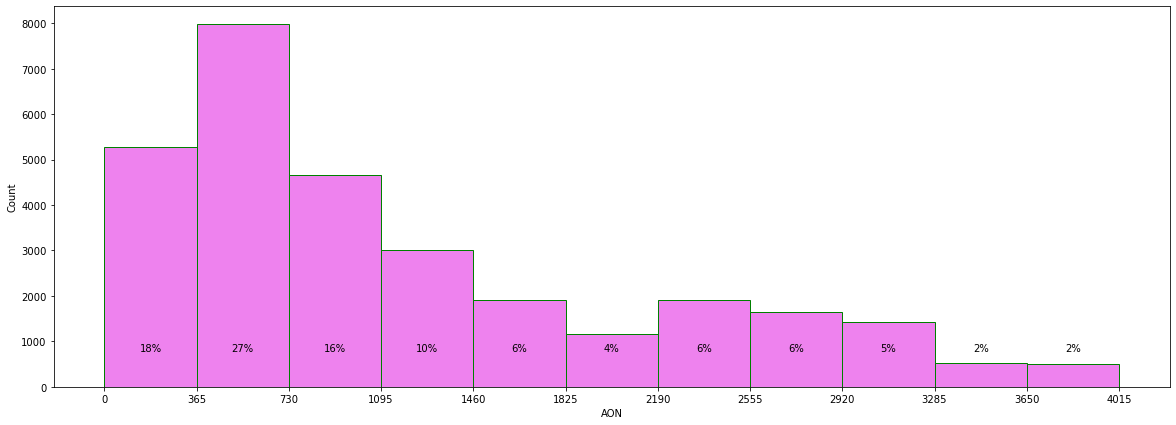

In [505]:
fig, ax = plt.subplots(figsize=(20,7))
counts, bins, patches = ax.hist(highValuedUser['aon'],bins=range(0,round(highValuedUser['aon'].max()),round(365)), facecolor='violet', edgecolor='green')
    
# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
    # Label
    rate = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(rate, xy=(x,0.2), xycoords=('data', 'axes fraction'),
    xytext=(0, -32), textcoords='offset points', va='top', ha='center')
    
ax.set_xlabel('AON')
ax.set_ylabel('Count')
plt.show()

We can see that, 
- 27% high value users are in 2nd year with this Network
- Approximately 75% of users are having not more than 4 years of Age on network
- About 7% of high value users are using this network for 9-10 years. 


In [506]:
#Create Derived categorical variable
highValuedUser['AonCategory'] = pd.cut(teleChurn['aon'], range(0,teleChurn['aon'].max(),365), labels=range(0,int(round(teleChurn['aon'].max()/365))-1))


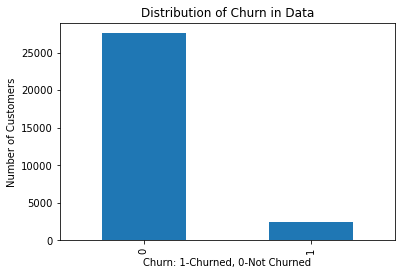

In [507]:
# Data Imbalance check with respect to "churn" column 

highValuedUser["churn"].value_counts().plot.bar()
plt.xlabel("Churn: 1-Churned, 0-Not Churned")
plt.ylabel("Number of Customers")
plt.title("Distribution of Churn in Data")
plt.show()

In [508]:
highValuedUser["churn"].value_counts(normalize=True)

0    0.918636
1    0.081364
Name: churn, dtype: float64

Thus a heavy class imbalance can be seen in the data with respect to the target variable "churn"(about 92% of the data belongs to the non churn class), thus we can say for sure that a class imbalance handling technique will have to be used here before modelling to avoid over fitiing in the models built.

In [509]:
# For the purpose of univariate analysis lets divide the dataset into two,i.e. the Churned and Not Churned Customers 

Churned=highValuedUser.loc[highValuedUser.churn==1] 
Not_Churned=highValuedUser.loc[highValuedUser.churn==0] 

# To check if the split has been carried out properly 

Not_Churned["churn"].value_counts()

0    27560
Name: churn, dtype: int64

Thus, the split has been made and now we can move on to univariate analysis.

#### Average Revenue per User

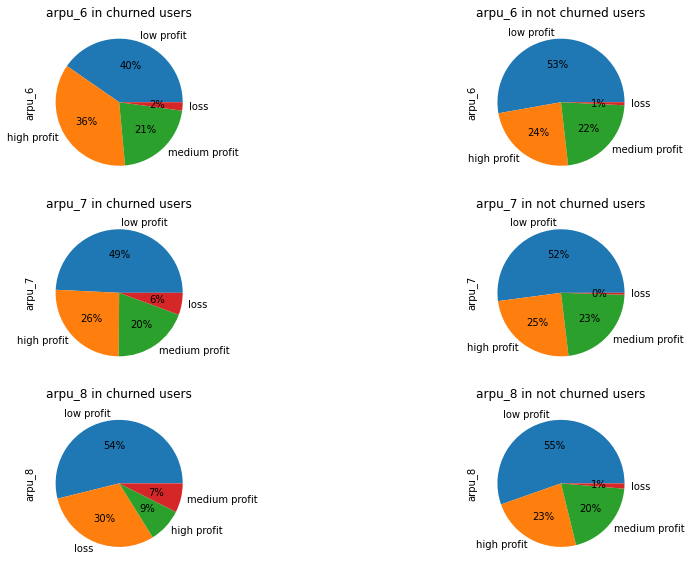

In [510]:
# Average revenue per user and churn 

plt.subplot(3,2,1)
Churned['arpu_6']=pd.cut(Churned.arpu_6,[-2258.709,0,500,700,40000],labels=['loss','low profit','medium profit','high profit']) 
Churned.arpu_6.value_counts().plot.pie(autopct='%1.0f%%') 
plt.title("arpu_6 in churned users")

plt.subplot(3,2,2) 
Not_Churned['arpu_6']=pd.cut(Not_Churned.arpu_6,[-2258.709,0,500,700,40000],labels=['loss','low profit','medium profit','high profit']) 
Not_Churned.arpu_6.value_counts().plot.pie(autopct='%1.0f%%') 
plt.title("arpu_6 in not churned users")

plt.subplot(3,2,3)
Churned['arpu_7']=pd.cut(Churned.arpu_7,[-2014.045,0,500,700,40000],labels=['loss','low profit','medium profit','high profit']) 
Churned.arpu_7.value_counts().plot.pie(autopct='%1.0f%%')
plt.title("arpu_7 in churned users")

plt.subplot(3,2,4)
Not_Churned['arpu_7']=pd.cut(Not_Churned.arpu_7,[-2014.045,0,500,700,40000],labels=['loss','low profit','medium profit','high profit']) 
Not_Churned.arpu_7.value_counts().plot.pie(autopct='%1.0f%%')
plt.title("arpu_7 in not churned users")

plt.subplot(3,2,5)
Churned['arpu_8']=pd.cut(Churned.arpu_8,[-945.808,0,500,700,40000],labels=['loss','low profit','medium profit','high profit']) 
Churned.arpu_8.value_counts().plot.pie(autopct='%1.0f%%') 
plt.title("arpu_8 in churned users")

plt.subplot(3,2,6)
Not_Churned['arpu_8']=pd.cut(Not_Churned.arpu_8,[-945.808,0,500,700,40000],labels=['loss','low profit','medium profit','high profit']) 
Not_Churned.arpu_8.value_counts().plot.pie(autopct='%1.0f%%')
plt.title("arpu_8 in not churned users")

plt.subplots_adjust(right=2,top=2) 

plt.show()

- It can be seen that over the course of 3 months i.e. (the good and action phases) the average revenue per user in case of churned customers has kept on decreasing as can be seen from the increasing percentage of users contributing to losses for the company over the months (in the 6th month customers in the churn category who caused losses were just 2%, while in the 8th month this increased to 30%).

- In the 6th month about 36% of users in the churned category contributed to high revenues of the company, but by the 8th month the percentage has fallen to 9% indicating that many of those customers were unhappy with service and were not using the service as much as they did earlier. 

- In the case of not churned customers the revenue distribution is uniform throughout the 3 months i.e. no major losses or low profits suddenly in the span of 3 months.

In [511]:
#Let's filter monthly columns
allCol = highValuedUser.filter(regex ='_6').columns
monthCols = [item.strip('_6') for item in allCol]
print(monthCols)

#Monthly columns and profile columns numbers
print ("Columns:", highValuedUser.shape[1] )
print ("Monthly Columns : ",len(monthCols))
print ("Total Monthly columns (phase-wise) (%d*4): %d"%(len(monthCols), len(monthCols) * 4))
print ("Columns other than Monthly Columns :", highValuedUser.shape[1] - (len(monthCols) * 4))

['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou', 'std_og_mou', 'isd_og_mou', 'spl_og_mou', 'og_others', 'total_og_mou', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_mou', 'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others', 'total_rech_num', 'total_rech_amt', 'max_rech_amt', 'date_of_last_rech', 'last_day_rch_amt', 'total_rech_data', 'max_rech_data', 'count_rech_2g', 'count_rech_3g', 'av_rech_amt_data', 'vol_2g_mb', 'vol_3g_mb', 'arpu_3g', 'arpu_2g', 'night_pck_user', 'monthly_2g', 'sachet_2g', 'monthly_3g', 'sachet_3g', 'fb_user', 'jun_vbc_3g']
Columns: 228
Monthly Columns :  51
Total Monthly columns (phase-wise) (51*4): 204
Columns other than Monthly Columns : 24


In [512]:
# remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).
mon9 = highValuedUser.filter(regex=('_9')).columns
highValuedUser.drop(mon9,axis=1,inplace=True)

In [513]:
#list of monthly columns 6,7,8
monthCol = [x + s for s in ['_6','_7','_8'] for x in monthCols]
print('-----------------Month---------------------------------------')
print(monthCol)
print('\n')

#List of non month columns
nonMonthCol = [col for col in highValuedUser.columns if col not in monthCol]
print('-----------------Non month-----------------------------------')
print(nonMonthCol)

-----------------Month---------------------------------------
['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6', 'date_of_last_rech_6', 'last_day_rch_amt_6', 'total_rech_data_6', 'max_rech_data_6', 'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 'monthly_2g_6', 'sachet_2g_6', 'monthly_3g_6', 'sachet_3g_6', 'fb_user_6', 'jun_vbc_3g_6', 'arpu_7', 'onnet_mou_7', 'offnet_mou_7

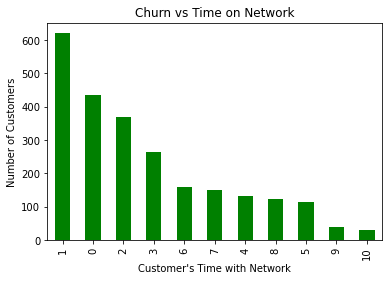

In [514]:
# Duration for which the customer has been using the network and churn 
Churned["AonCategory"].value_counts().plot.bar(color='green')
plt.xlabel("Customer's Time with Network")
plt.ylabel("Number of Customers")
plt.title("Churn vs Time on Network")

plt.show() 

It can be seen from the above plots that among the customers who have churned, the greatest proportion of churns occured among those who had been using the network for a very short period of time i.e. 0 to 2 years.

In [515]:
#Function to plot by churn

def Churnplot(df,column):
    # per month churn vs Non-Churn
    fig, ax = plt.subplots(figsize=(6,5))
    columnList=list(df.filter(regex=(column)).columns)
    columnList = columnList[:3]
    plt.plot(highValuedUser.groupby('churn')[columnList].mean().T)
    ax.set_xticklabels(['June','July','August','September'])
    plt.xlabel("Month")
    plt.ylabel(column)
    plt.legend(['Non-Churn', 'Churn'])
    plt.title( str(column) +" V/S Month", loc='right', fontsize=10, fontweight=0.5, color='green')
    plt.show()
    return highValuedUser.groupby('churn')[columnList].mean()

#Function - Churn by MOU
def ChurnMouplot(columns,typeOfCall):
    fig, ax = plt.subplots(figsize=(6,5))
    dataFrame=highValuedUser.groupby(['churn'])[columns].mean().T
    plt.plot(dataFrame)
    ax.set_xticklabels(['June','July','August','September'])
    #Add titles
    plt.title("Avg. "+typeOfCall+" MOU  V/S Month", loc='right', fontsize=10, fontweight=0.5, color='green')
    plt.xlabel("Month")
    plt.ylabel("Avg. "+typeOfCall+" MOU")
    #Add legend
    plt.legend(['Non-Churn','Churn'])

#### Incoming/Outgoing MOU v/s Churn

       total_ic_mou_6  total_ic_mou_7  total_ic_mou_8
churn                                                
0          295.131789      306.840677      299.096525
1          231.451344      182.907534       63.444342
       total_og_mou_6  total_og_mou_7  total_og_mou_8
churn                                                
0          593.763075      628.442026      581.998003
1          791.678435      627.508218      209.361368


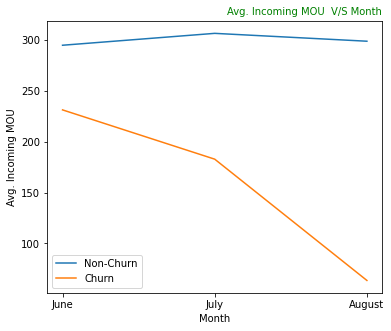

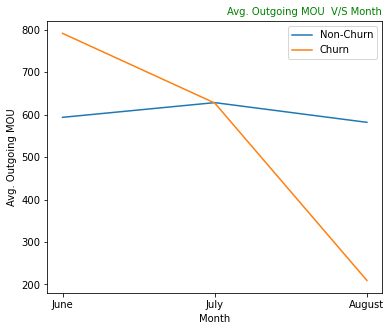

In [516]:
incomingCol = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
outgoingCol = ['total_og_mou_6','total_og_mou_7','total_og_mou_8']
ChurnMouplot(incomingCol,'Incoming')
ChurnMouplot(outgoingCol,'Outgoing')

# Avg.Incoming MOU per month churn vs Non-Churn
print(highValuedUser.groupby(['churn'])['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'].mean())
# Avg. Outgoing MOU per month churn vs Non-Churn
print(highValuedUser.groupby(['churn'])['total_og_mou_6','total_og_mou_7','total_og_mou_8'].mean())

Observation from the table and plot:
- Churners Incoming and Ourgoing calls are drastically dropping after July month.
- non Churners are showing consistant pattern both in incoming and outgoing calls
- This could be a key feature


#### Last day rechargeamount v/s Churn

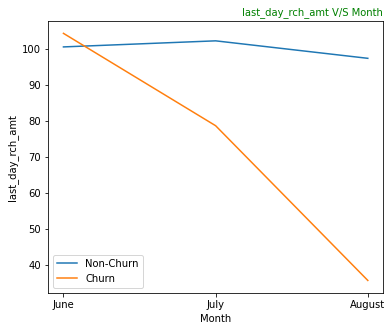

,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8
churn,,,
0,100.586938,102.275508,97.416800
1,104.356002,78.684146,35.680049


In [517]:
Churnplot(highValuedUser,'last_day_rch_amt')

Observation-
- Average last day recharge amount for churner is less than non churner 
- Recharge is decreasing for the customers who are churning

#### arpu VS Churn

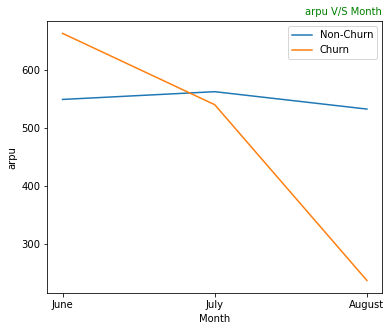

,arpu_6,arpu_7,arpu_8
churn,,,
0,549.220390,562.608191,532.635710
1,663.158246,540.165968,237.200793


In [518]:
Churnplot(highValuedUser,'arpu')

Observation-
- Average Revenue per user is also drastically decreasing for churners
- For non churners, the value is consistant

#### max_rech_amt VS Churn

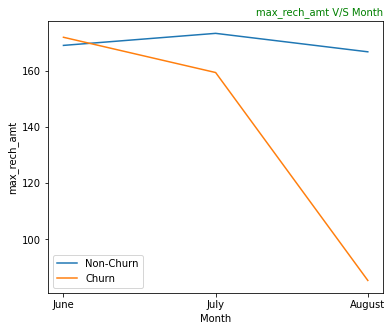

,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8
churn,,,
0,169.049456,173.336575,166.767199
1,171.942237,159.388775,85.370750


In [519]:
Churnplot(highValuedUser,'max_rech_amt')

Observation-
- Maximum recharge amount is also significantly dropping for Churners. 
- For non churners it is consistant

#### Total monthly rech VS Churn

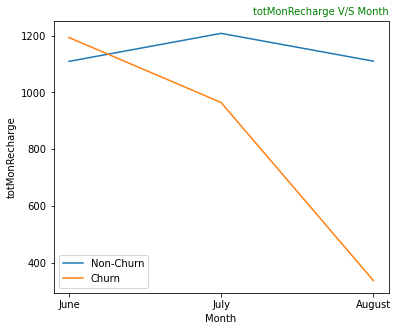

,totMonRecharge6,totMonRecharge7,totMonRecharge8
churn,,,
0,1109.651781,1208.584619,1110.586829
1,1193.936370,964.583806,336.676182


In [520]:
Churnplot(highValuedUser,'totMonRecharge')

Observation-
- Total montly recharge amount is also following same pattern, It drops for churners and is consistant for non churners.

#### Total data volume VS Churn

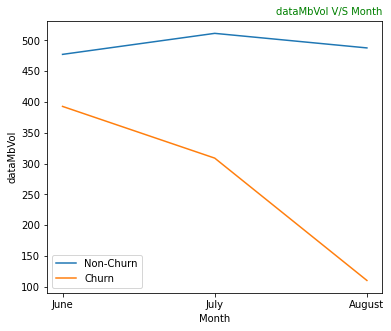

,dataMbVol6,dataMbVol7,dataMbVol8
churn,,,
0,477.396226,511.506894,487.874238
1,392.945514,309.012290,110.481770


In [521]:
Churnplot(highValuedUser,'dataMbVol')

Observation-
- Total montly recharge amount is also following same pattern, It drops for churners and is consistant for non churners.

#### derived feature
Creating feature: ratio_loc_og_to_ic_mou_6, ratio_loc_og_to_ic_mou_7, ratio_loc_og_to_ic_mou_8. <br>
These features will hold the ratio (=loc_og_mou_(6/7/8) / loc_ic_mou_) for each month. These features will combine both incoming and outgoing informations and would be a better predictor for churn.

In [522]:
#Creating new ratio feature
for i in range(6,9):
    highValuedUser['ratio_loc_og_to_ic_mou_'+str(i)] = (highValuedUser['loc_og_mou_'+str(i)])/(highValuedUser['loc_ic_mou_'+str(i)]+1)
    #Add 1 to denominator to not to get divide by 0 exception

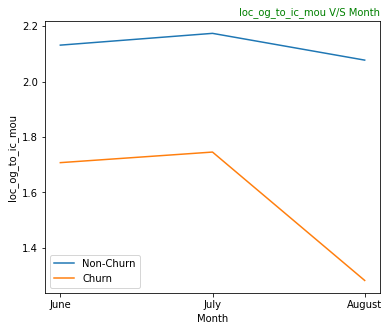

,ratio_loc_og_to_ic_mou_6,ratio_loc_og_to_ic_mou_7,ratio_loc_og_to_ic_mou_8
churn,,,
0,2.131420,2.173896,2.077358
1,1.707495,1.745668,1.282543


In [523]:
Churnplot(highValuedUser,'loc_og_to_ic_mou')

Observation-
- Local outgoing to incoming call MOU ratio is less in case of Churners for all months.
- This ratio has drastically dropped after July month for Churners. 
- This ratio has sligtly dropped for non churners too after July.
- This inferes, The users who are not making too many calls or not recieving too many calls are most likely to Churn.

#### derived feature
Create features totLocMou_6, totLocMou_7, Total_loc_mou_8<br>
These features will hold the Total MOU (loc_og_mou+loc_ic_mou) for each month.<br>
Using these we will find if the loc MOU (both incoming and outgoing) drops or increaces.<br>

In [524]:
#Create new feature: totLocMou_6,totLocMou_7,totLocMou_8
for i in range(6,9):
    highValuedUser['totLocMou_'+str(i)] = (highValuedUser['loc_og_mou_'+str(i)])+(highValuedUser['loc_ic_mou_'+str(i)])

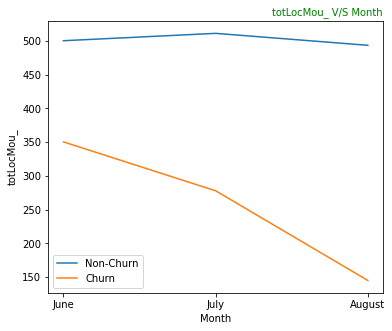

,totLocMou_6,totLocMou_7,totLocMou_8
churn,,,
0,500.280781,511.189078,493.490385
1,350.464556,278.053150,145.278578


In [525]:
Churnplot(highValuedUser,'totLocMou_')

Observation-
- Right from the beginning, for churners total local call MOU is low.
- This inferes, people who are not reciving or making calls during the tenure are much likely to churn

#### Create feature for Roaming
Create feature totRoamMou_6,totRoamMou_7,totRoamMou_8
Total roaming MOU (roam_ic_mou+roam_og_mou) for each month.
Using these we shall find pattern for roaming calls.

In [526]:
#Create feature totRoamMou_6,totRoamMou_7,totRoamMou_8
for i in range(6,9):
    highValuedUser['totRoamMou_'+str(i)] = (highValuedUser['roam_ic_mou_'+str(i)])+(highValuedUser['roam_og_mou_'+str(i)])

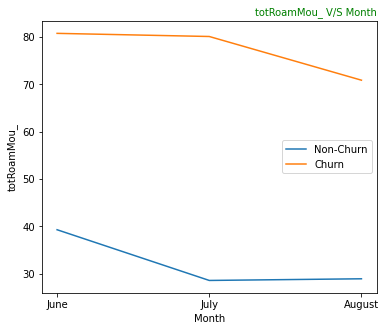

,totRoamMou_6,totRoamMou_7,totRoamMou_8
churn,,,
0,39.309139,28.604839,28.955369
1,80.761930,80.098779,70.875625


In [527]:
Churnplot(highValuedUser,'totRoamMou_')

Observation-
- This pattern is totally different. For Churners, roaming calls are very high than non churners.
- This suggests that the people who are making too many roaming calls or recieving too many roaming calls are more likely to churn
- Looks like, tarrif rate is higher for roaming calls

## Step6: Outliers treatment

In [528]:
teleChurn.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g_8,july_vbc_3g_7,jun_vbc_3g_6,sep_vbc_3g_9,dataMbVol6,dataMbVol7,dataMbVol8,dataMbVol9,avgRechAmt6,avgRechAmt7,avgRechAmt8,avgRechAmt9,totalRechNumData6,totalRechNumData7,totalRechNumData8,totalRechNumData9,totalRechAmtData6,totalRechAmtData7,totalRechAmtData8,totalRechAmtData9,totMonRecharge6,totMonRecharge7,totMonRecharge8,totMonRecharge9
count,9.999900e+04,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.00000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,9999

In [529]:
#Remove outliers > 99% and <1%
numericCol=teleChurn.select_dtypes(include=['int64','float64']).columns.tolist()
for col in numericCol:
    percentiles = teleChurn[col].quantile([0.01,0.99]).values
    teleChurn[col][teleChurn[col] <= percentiles[0]] = percentiles[0]
    teleChurn[col][teleChurn[col] >= percentiles[1]] = percentiles[1]

In [530]:
teleChurn.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g_8,july_vbc_3g_7,jun_vbc_3g_6,sep_vbc_3g_9,dataMbVol6,dataMbVol7,dataMbVol8,dataMbVol9,avgRechAmt6,avgRechAmt7,avgRechAmt8,avgRechAmt9,totalRechNumData6,totalRechNumData7,totalRechNumData8,totalRechNumData9,totalRechAmtData6,totalRechAmtData7,totalRechAmtData8,totalRechAmtData9,totMonRecharge6,totMonRecharge7,totMonRecharge8,totMonRecharge9
count,9.999900e+04,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,999

## Step4: Modeling

In [531]:
#Import all the required libraries
import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

####  Roc Function


In [532]:
#### ROC
def draw_roc( actualval, probval):
    fpr, tpr, thresholds = metrics.roc_curve( actualval, probval,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actualval, probval )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('Receiver operating characteristic example')
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="left")
    plt.show()
    return fpr, tpr, thresholds


### Step4.1: Data preparation

In [533]:
# creating copy of the final highvalue User dataframe
highValuedUserVals = highValuedUser.copy()
# removing the columns not required for modeling
highValuedUserVals.drop(['mobile_number', 'AonCategory'], axis=1, inplace=True)

In [534]:
# removing the datatime 
dtCol = list(highValuedUserVals.select_dtypes(include=['datetime64']).columns)
print(dtCol)
highValuedUserVals.drop(dtCol, axis=1, inplace=True)

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


### Step 4.1.1: Train - test split

In [535]:
#Train test splitting
#import library
from sklearn.model_selection import train_test_split

#putting features variables in X
X = highValuedUserVals.drop(['churn'], axis=1)

#putting response variables in Y
y = highValuedUserVals['churn']    

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [536]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g_8,july_vbc_3g_7,jun_vbc_3g_6,dataMbVol6,dataMbVol7,dataMbVol8,dataMbVol9,avgRechAmt6,avgRechAmt7,avgRechAmt8,avgRechAmt9,totalRechNumData6,totalRechNumData7,totalRechNumData8,totalRechNumData9,totalRechAmtData6,totalRechAmtData7,totalRechAmtData8,totalRechAmtData9,totMonRecharge6,totMonRecharge7,totMonRecharge8,totMonRecharge9,ratio_loc_og_to_ic_mou_6,ratio_loc_og_to_ic_mou_7,ratio_loc_og_to_ic_mou_8,totLocMou_6,totLocMou_7,totLocMou_8,totRoamMou_6,totRoamMou_7,totRoamMou_8
11785,1086.343,910.298,592.623,5.69,8.28,4.84,151.89,159.01,98.06,28.96,26.66,31.11,6.13,14.38,9.86,5.39,7.39,4.84,21.63,30.58,19.81,1.19,0.00,0.00,0.0,6.40,1.10,28.23,37.98,24.66,0.00,0.00,0.00,2.61,10.89,13.26,0.00,0.00,0.00,2.61,10.89,13.26,120.61,95.48,54.01,0.00,8.55,1.10,0.00,0.0,0.0,151.46,152.91,93.04,15.29,35.24,46.11,134.14,140.98,105.54,7.18,9.74,2.18,156.63,185.98,153.84,0.00,0.00,0.00,17.44,32.93,57.56,0.00,0.00,0.00,17.44,32.93,57.56,433.09,356.41,266.61,0.00,0.0,0.0,259.01,135.48,55.19,0.00,2.01,0.00,8,5,3,1481,892,658,398,459,229,398,35,200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,3651,0.00,0.00,0.00,0,0,0,0,186.12,179.40,220.33,113.80,0,0,0,0,0.0,0.0,0.0,0.0,1481.0,892.0,658.0,564.0,0.179090,0.203123,0.159261,184.86,223.96,178.50,35.09,41.04,40.97
11987,513.359,311.602,364.126,144.89,49.84,40.71,321.14,227.63,265.41,0.00,0.00,0.00,0.00,0.00,0.00,64.46,30.58,40.71,277.44,179.54,211.56,12.14,5.18,34.54,0.0,16.51,0.00,354.06,215.31,286.83,80.43,19.26,0.00,31.54,19.59,19.29,0.00,6.78,0.00,111.98,45.64,19.29,0.00,0.00,0.00,0.00,16.51,0.00,0.00,0.0,0.0,466.04,277.48,306.13,27.43,21.46,36.66,143.86,204.43,242.16,91.86,57.33,13.73,263.16,283.23,292.56,15.63,14.01,0.00,29.08,28.99,22.28,35.48,3.90,0.00,80.19,46.91

### Step 4.1.2 Rescale

In [537]:
#Rescaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# fitting and transforming the scaler on train
X_train[X_train.columns] = scaler.fit_transform(X_train)
# transforming the train using the already fit scaler
X_test[X_test.columns] = scaler.transform(X_test)

In [538]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g_8,july_vbc_3g_7,jun_vbc_3g_6,dataMbVol6,dataMbVol7,dataMbVol8,dataMbVol9,avgRechAmt6,avgRechAmt7,avgRechAmt8,avgRechAmt9,totalRechNumData6,totalRechNumData7,totalRechNumData8,totalRechNumData9,totalRechAmtData6,totalRechAmtData7,totalRechAmtData8,totalRechAmtData9,totMonRecharge6,totMonRecharge7,totMonRecharge8,totMonRecharge9,ratio_loc_og_to_ic_mou_6,ratio_loc_og_to_ic_mou_7,ratio_loc_og_to_ic_mou_8,totLocMou_6,totLocMou_7,totLocMou_8,totRoamMou_6,totRoamMou_7,totRoamMou_8
11785,0.111540,0.078696,0.027671,0.000771,0.001015,0.000450,0.018164,0.016449,0.007001,0.011185,0.006991,0.010734,0.001939,0.005114,0.001847,0.000838,0.001032,0.000450,0.004573,0.006710,0.003993,0.000812,0.000000,0.000000,0.0,0.011234,0.003127,0.002652,0.005075,0.002234,0.000000,0.000000,0.000000,0.000314,0.001173,0.000951,0.000000,0.000000,0.000000,0.000309,0.000996,0.000948,0.02044,0.017391,0.009506,0.000000,0.006755,0.001403,0.00000,0.0,0.0,0.014190,0.013454,0.006625,0.003504,0.008845,0.011518,0.028578,0.033796,0.022729,0.004278,0.004912,0.001372,0.021011,0.032866,0.028548,0.000000,0.000000,0.000000,0.003767,0.009489,0.010195,0.000000,0.000000,0.000000,0.003194,0.004882,0.009662,0.056128,0.047886,0.043947,0.000000,0.0,0.0,0.038149,0.028535,0.016077,0.000000,0.001344,0.000000,0.058824,0.041667,0.015306,0.042086,0.022115,0.014519,0.099252,0.114464,0.051472,0.099252,0.008728,0.044954,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005955,0.001856,0.005363,0.003022,0.002714,0.003575,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.838203,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046402,0.071574,0.049512,0.037921,0.000000,0.000000,0.000000,0.000000,0.000000,

### Step 4.1.3 Class Imbalance handling -SMOTE (Synthetic Minority Over-sampling Technique)

As we saw above, Our dataset is having highly imbalanced categories (churn is ~8%).
Most of the times, minority classes are treated as noise and are ignored often. This would lead to overfitting and misclassification.<br><br>

**SMOTE**:
A subset of data is taken from the minority class as an example and then new synthetic similar instances are created. These synthetic instances are then added to the original dataset. The new dataset is used as a sample to train the classification models.

In [539]:
#Before oversmapling, lets print label counts:
print("Before SMOTE count:")
print("label '1': {}".format(sum(y_train==1)))
print("label '0': {}".format(sum(y_train==0)))
print("churn rate : {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

Before SMOTE count:
label '1': 1691
label '0': 19309
churn rate : 8.05% 



In [540]:
#!pip install imblearn

In [541]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train_res, y_train_res = sm.fit_resample(X_train,y_train)

In [542]:
X_train_res.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g_8,july_vbc_3g_7,jun_vbc_3g_6,dataMbVol6,dataMbVol7,dataMbVol8,dataMbVol9,avgRechAmt6,avgRechAmt7,avgRechAmt8,avgRechAmt9,totalRechNumData6,totalRechNumData7,totalRechNumData8,totalRechNumData9,totalRechAmtData6,totalRechAmtData7,totalRechAmtData8,totalRechAmtData9,totMonRecharge6,totMonRecharge7,totMonRecharge8,totMonRecharge9,ratio_loc_og_to_ic_mou_6,ratio_loc_og_to_ic_mou_7,ratio_loc_og_to_ic_mou_8,totLocMou_6,totLocMou_7,totLocMou_8,totRoamMou_6,totRoamMou_7,totRoamMou_8
0,0.111540,0.078696,0.027671,0.000771,0.001015,0.000450,0.018164,0.016449,0.007001,0.011185,0.006991,0.010734,0.001939,0.005114,0.001847,0.000838,0.001032,0.000450,0.004573,0.006710,0.003993,0.000812,0.000000,0.000000,0.0,0.011234,0.003127,0.002652,0.005075,0.002234,0.000000,0.000000,0.000000,0.000314,0.001173,0.000951,0.000000,0.000000,0.000000,0.000309,0.000996,0.000948,0.02044,0.017391,0.009506,0.000000,0.006755,0.001403,0.00000,0.0,0.0,0.014190,0.013454,0.006625,0.003504,0.008845,0.011518,0.028578,0.033796,0.022729,0.004278,0.004912,0.001372,0.021011,0.032866,0.028548,0.000000,0.000000,0.000000,0.003767,0.009489,0.010195,0.000000,0.000000,0.000000,0.003194,0.004882,0.009662,0.056128,0.047886,0.043947,0.000000,0.0,0.0,0.038149,0.028535,0.016077,0.000000,0.001344,0.000000,0.058824,0.041667,0.015306,0.042086,0.022115,0.014519,0.099252,0.114464,0.051472,0.099252,0.008728,0.044954,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005955,0.001856,0.005363,0.003022,0.002714,0.003575,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.838203,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046402,0.071574,0.049512,0.037921,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [543]:
#After Oversampling
print("After Oversampling")
print('shape of train_X: {}'.format(X_train_res.shape))
print('shape of train_y: {}'.format(y_train_res.shape))
print("label '1': {}".format(sum(y_train_res==1)))
print("label '0': {}".format(sum(y_train_res==0)))
print("Churn rate : {}% ".format(round(sum(y_train_res==1)/len(y_train_res)*100,2)))


After Oversampling
shape of train_X: (38618, 180)
shape of train_y: (38618,)
label '1': 19309
label '0': 19309
Churn rate : 50.0% 


We can see that classes are balanced.

### Step 4.2 ML  models

In [544]:
#import required modules
import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

#### Function for ROC curve


ROC Curve : An ROC curve states that:-

- It shows the tradeoff between sensitivity and specificity.
- The closer the curve follows the left-hand border and then the top border of the ROC space,the test becomes more accurate
- The closer the curve comes to the 45-degree diagonal of the ROC space,test becomes less accurate

In [545]:
def plot_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

##### Function to fit the model

In [546]:
def fitModel(alg, X_train, y_train, performCV=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')    
    #model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
    print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g ---- Std - %.7g ---- Min - %.7g ---- Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

##### Model Evaluation metrics function

In [547]:
def modelMetrics(actual_churn=False,pred_churn=False):
    confusion = metrics.confusion_matrix(actual_churn, pred_churn)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_churn,pred_churn)))
    # sensitivity of our logistic regression model
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    # specificity
    print('Specificity: {}'.format(TN / float(TN+FP)))
    # false postive rate - predicting churn when customer does not have churned
    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
    # positive predictive value 
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    # Negative predictive value
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    # sklearn precision score value 
    print('sklearn precision score value: {}'.format(metrics.precision_score(actual_churn, pred_churn )))

#### Find Optimal cutoff

Optimal Cutoff Point<br>

Since recall or sensitivity is a much more important metrics for churn prediction. A trade off between sensitivity(or recall) and specificity is to be considered for the same . We will try adjusting the probability cut offs which will result into higher sensitivity or recall rate

In [548]:
def findOptCut(df):
    #Function to find the optimal cutoff for classifing as churn/non-churn
    #columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.churn_Prob.map( lambda x: 1 if x > i else 0)
    #calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(df.churn, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    #plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

##### Predicting Churn with the help of probability

In [549]:
def predChurnWithProbCutOff(model,X,y,prob):
    # Funtion to predict the churn using the input probability cut-off
    # Input arguments: model instance, x and y to predict using model and cut-off probability
    
    # predict
    pred_probs = model.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
    y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > prob else 0)
    # Let's see the head
    modelMetrics(y_df.churn,y_df.final_predicted)
    return y_df

### Step4.2.1: Logistic Regression

In [550]:
#Import logistic model
from sklearn.linear_model import LogisticRegression 
logreg=LogisticRegression(random_state=42)
logreg.fit(X_train_res,y_train_res)

LogisticRegression(random_state=42)

In [551]:
# Model Evaluation 

y_train_pred=logreg.predict(X_train_res)

from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,classification_report 

print('Accuracy= ',accuracy_score(y_train_res,y_train_pred))
print('\n classification report; \n',classification_report(y_train_res,y_train_pred))
print('\n confusion matrix; \n',confusion_matrix(y_train_res,y_train_pred)) 

Accuracy=  0.8947640996426537

 classification report; 
               precision    recall  f1-score   support

           0       0.92      0.86      0.89     19309
           1       0.87      0.93      0.90     19309

    accuracy                           0.89     38618
   macro avg       0.90      0.89      0.89     38618
weighted avg       0.90      0.89      0.89     38618


 confusion matrix; 
 [[16692  2617]
 [ 1447 17862]]


In [552]:
# Perfromance on test set 

y_test_pred=logreg.predict(X_test)

print('Accuracy= ',accuracy_score(y_test,y_test_pred))
#print('Recall= ',recall_score(y_test,y_test_pred))
#print(sensitivity(y_test,y_test_pred))
print('\n classification report; \n',classification_report(y_test,y_test_pred))
print('\n confusion matrix; \n',confusion_matrix(y_test,y_test_pred))

Accuracy=  0.8743472947450284

 classification report; 
               precision    recall  f1-score   support

           0       0.99      0.87      0.93      8251
           1       0.39      0.88      0.54       750

    accuracy                           0.87      9001
   macro avg       0.69      0.88      0.73      9001
weighted avg       0.94      0.87      0.89      9001


 confusion matrix; 
 [[7208 1043]
 [  88  662]]


In [553]:
# Feature Selection using RFE 
# RFECV is used to get the number of features at which the performance of the model is at the best 
from sklearn.feature_selection import RFECV 
rfecv=RFECV(estimator=logreg,cv=2)

In [554]:
%%time 
rfecv.fit(X_train_res,y_train_res) 

rfecv.grid_scores_

Wall time: 4min 47s


array([0.80571236, 0.85356569, 0.85703558, 0.85996168, 0.8690507 ,
       0.86511471, 0.8700347 , 0.87130354, 0.86868818, 0.86873997,
       0.86967217, 0.87008649, 0.87309027, 0.87526542, 0.87697447,
       0.87648247, 0.87798436, 0.87547258, 0.8778031 , 0.87795846,
       0.87751826, 0.87650836, 0.87601637, 0.87591279, 0.87640479,
       0.87619763, 0.87702626, 0.87674142, 0.87715573, 0.87705215,
       0.87715573, 0.87754415, 0.87754415, 0.87700036, 0.87725931,
       0.8773111 , 0.87852815, 0.87852815, 0.87847636, 0.8782951 ,
       0.8782951 , 0.87891657, 0.87956393, 0.87966751, 0.88013362,
       0.87984878, 0.88013362, 0.88041846, 0.88065151, 0.88059972,
       0.88036667, 0.88036667, 0.88059972, 0.88034077, 0.88062561,
       0.88059972, 0.88059972, 0.88083277, 0.8811953 , 0.88111761,
       0.8806774 , 0.88088456, 0.88072919, 0.88083277, 0.88059972,
       0.88062561, 0.88041846, 0.88052204, 0.88065151, 0.88041846,
       0.88062561, 0.88052204, 0.88047025, 0.88041846, 0.88065

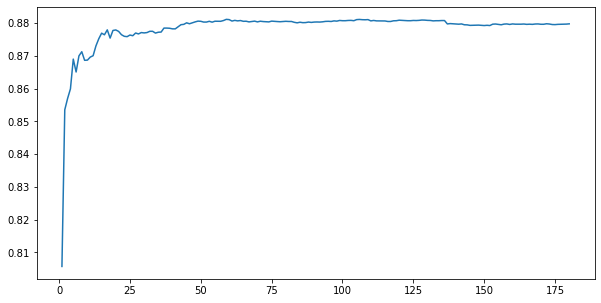

In [555]:
plt.figure(figsize=[10,5])
num_features=X_train_res.shape
plt.plot(range(1,num_features[1]+1),rfecv.grid_scores_)
plt.show()

In [556]:
rfecv.n_features_

59

We can take feature as 65 as we can see, after this value the graph looks constant.

In [557]:
# Using RFE for feature selection 
from sklearn.feature_selection import RFE 
rfe=RFE(logreg,65) 
rfe=rfe.fit(X_train_res,y_train_res)

In [558]:
rfe.support_

array([ True,  True, False, False,  True, False, False,  True,  True,
       False, False, False, False,  True, False, False, False, False,
       False,  True,  True, False, False,  True,  True, False, False,
       False, False,  True, False, False, False, False,  True,  True,
       False, False,  True, False,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False,  True, False,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True, False, False, False,
       False, False,  True,  True, False, False, False, False,  True,
        True, False,  True, False,  True,  True, False, False, False,
       False, False,  True,  True,  True, False,  True,  True, False,
       False, False,  True,  True,  True,  True, False, False,  True,
       False, False,  True, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
        True,  True,

In [559]:
list(zip(X_train_res.columns,rfe.support_,rfe.ranking_))

# Columns supported by RFE 
col=X_train_res.columns[rfe.support_]
col


Index(['arpu_6', 'arpu_7', 'onnet_mou_7', 'offnet_mou_7', 'offnet_mou_8', 'roam_og_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_mou_8', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_7', 'std_og_mou_8', 'spl_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_6', 'total_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_8', 'isd_ic_mou_7', 'isd_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'max_rech_amt_6', 'max_rech_amt_7', 'last_day_rch_amt_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_8', 'count_rech_2g_8', 'av_rech_amt_data_7', 'vol_2g_mb_8', 'arpu_2g_6', 'arpu_2g_7', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_8', 'aug_vbc_3g_8', 'dataMbVol7', 'dataMbVol9',
       '

In [560]:
# Building and assessing the model built with RFE chosen columns 

import statsmodels.api as sm 

X_train_sm=sm.add_constant(X_train_res[col])
logm1=sm.GLM(y_train_res,X_train_sm,family=sm.families.Binomial())
res=logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38555
Model Family:                Binomial   Df Model:                           62
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 04 Apr 2021   Deviance:                          nan
Time:                        20:37:19   Pearson chi2:                 1.44e+19
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.344e+15   9.08e+06  -2.58e+08      0.000   -2.34e+15   -2.34e+15
arpu_6              1.102e+16   8.08e+07   1.36e+08      0.000     1.1e+16     1.1e+16
arpu_7              2.588e+16   1.09e+08   2.37e+08      0.000    2.59e+16    2.59e+16
onnet_mou_7        -3.124e+14   2.47e+07  -1.26e+07      0.000   -3.12e+14   -3.12e+14
offnet_mou_7        3.321e+15   8.96e+07   3.71e+07      0.000    3.32e+15    3.32e+15
offnet_mou_8       -2.735e+15   1.49e+08  -1.83e+07      0.000   -2.73e+15   -2.73e+15
roam_og_mou_7        4.56e+15   2.42e+07   1.88e+08      0.000    4.56e+15    4.56e+15
loc_og_t2m_mou_7   -2.696e+15   4.45e+07  -6.06e+07      0.000    -2.7e+15    -2.7e+15
loc_og_t2m_mou_8    8.813e+14   5.81e+07   1.52e+07      0.000    8.81e+14    8.81e+14
loc_og_t2f_mou_8   -3.962e+14   1.63e+07  -2.43e+07      0.000   -3.96e+14   -3.96e+14
loc_og_t2c_mou_6   -1.608e+15   1.79e+07     -9e+07      0.000   -1.61e+15   -1.61e+15
loc_og_mou_8        -2.32e+16   1.88e+08  -1.24e+08      0.000   -2.32e+16   -2.32e+16
std_og_t2m_mou_7   -3.536e+15   8.54e+07  -4.14e+07      0.000   -3.54e+15   -3.54e+15
std_og_t2m_mou_8    2.497e+15   1.51e+08   1.66e+07      0.000     2.5e+15     2.5e+15
std_og_t2f_mou_8   -3.353e+15   2.27e+07  -1.48e+08      0.000   -3.35e+15   -3.35e+15
std_og_mou_7        7.931e+14   3.53e+07   2.25e+07      0.000    7.93e+14    7.93e+14
std_og_mou_8        9.479e+15   2.06e+08    4.6e+07      0.000    9.48e+15    9.48e+15
spl_og_mou_8       -1.318e+15   2.04e+07  -6.47e+07      0.000   -1.32e+15   -1.32e+15
total_og_mou_8     -1.023e+16   2.06e+08  -4.98e+07      0.000   -1.02e+16   -1.02e+16
loc_ic_t2t_mou_8   -1.007e+17   4.07e+08  -2.47e+08      0.000   -1.01e+17   -1.01e+17
loc_ic_t2m_mou_7    4.242e+14   2.21e+07   1.92e+07      0.000    4.24e+14    4.24e+14
loc_ic_t2m_mou_8   -1.173e+17   4.72e+08  -2.48e+08      0.000   -1.17e+17   -1.17e+17
loc_ic_t2f_mou_6   -7.802e+14    2.1e+07  -3.71e+07      0.000    -7.8e+14    -7.8e+14
loc_ic_t2f_mou_8   -4.072e+16   1.62e+08  -2.51e+08      0.000   -4.07e+16   -4.07e+16
loc_ic_mou_6        -5.59e+14   1.57e+07  -3.55e+07      0.000   -5.59e+14   -5.59e+14
loc_ic_mou_7        1.779e+15   2.41e+07   7.39e+07      0.000    1.78e+15    1.78e+15
loc_ic_mou_8        1.196e+17   5.09e+08   2.35e+08      0.000     1.2e+17     1.2e+17
std_ic_t2t_mou_6    1.585e+15   4.44e+07   3.57e+07      0.000    1.58e+15    1.58e+15
std_ic_t2t_mou_8   -2.104e+15   4.28e+07  -4.92e+07      0.000    -2.1e+15    -2.1e+15
std_ic_t2f_mou_8   -2.622e+15   3.29e+07  -7.97e+07      0.000   -2.62e+15   -2.62e+15
std_ic_mou_6        3.456e+14   2.69e+07   1.29e+07      0.000    3.46e+14    3.46e+14
total_ic_mou_8     -2.545e+15   3.13e+07  -8.14e+07      0.000   -2.55e+15   -2.55e+15
spl_ic_mou_6        3.066e+15   4.09e+

Let's see VIF. 

In [561]:
# Calculating VIF values 

from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif = pd.DataFrame()
vif['Features'] = X_train_res[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_res[col].values, i) for i in range(X_train_res[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF",ascending=False)
vif

,Features,VIF
43,total_rech_data_8,inf
45,count_rech_2g_8,inf
51,monthly_2g_8,inf
52,sachet_2g_8,inf
25,loc_ic_mou_8,inf
62,totLocMou_8,inf
10,loc_og_mou_8,inf
58,totalRechNumData8,inf
20,loc_ic_t2m_mou_8,3576.23
18,loc_ic_t2t_mou_8,1502.66


In [562]:
#Vif features in list
vif.Features.tolist()

['total_rech_data_8',
 'count_rech_2g_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'loc_ic_mou_8',
 'totLocMou_8',
 'loc_og_mou_8',
 'totalRechNumData8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2t_mou_8',
 'total_og_mou_8',
 'std_og_mou_8',
 'offnet_mou_7',
 'arpu_7',
 'arpu_6',
 'offnet_mou_8',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'std_og_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_7',
 'total_ic_mou_8',
 'totMonRecharge9',
 'total_rech_amt_7',
 'onnet_mou_7',
 'total_rech_amt_6',
 'totalRechAmtData9',
 'loc_ic_mou_7',
 'loc_ic_t2m_mou_7',
 'av_rech_amt_data_7',
 'roam_og_mou_7',
 'max_rech_amt_6',
 'totRoamMou_7',
 'arpu_2g_7',
 'avgRechAmt6',
 'totRoamMou_8',
 'max_rech_amt_7',
 'dataMbVol7',
 'loc_ic_mou_6',
 'total_rech_data_7',
 'total_rech_num_8',
 'totalRechNumData9',
 'std_ic_mou_6',
 'avgRechAmt9',
 'max_rech_data_8',
 'std_ic_t2t_mou_6',
 'dataMbVol9',
 'arpu_2g_6',
 'total_rech_data_6',
 'std_ic_t2t_mou_8',
 'isd_ic_mou_8',
 'monthly_2g_7',
 'last_day_rch_amt_8

In [563]:
# Dropping some columns with high VIF
col=col.drop(['total_rech_data_8',
 'count_rech_2g_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'loc_ic_mou_8',
 'totLocMou_8',
 'loc_og_mou_8',
 'totalRechNumData8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2t_mou_8',
 'total_og_mou_8',
 'std_og_mou_8',
 'offnet_mou_7',
 'arpu_7',
 'arpu_6',
 'offnet_mou_8',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'std_og_mou_7',
 'loc_og_t2m_mou_8'],1)

In [564]:
col

Index(['onnet_mou_7', 'roam_og_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'std_og_t2f_mou_8', 'spl_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'loc_ic_mou_7', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_6', 'total_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_8', 'isd_ic_mou_7', 'isd_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'max_rech_amt_6', 'max_rech_amt_7', 'last_day_rch_amt_8', 'total_rech_data_6', 'total_rech_data_7', 'max_rech_data_8', 'av_rech_amt_data_7', 'vol_2g_mb_8', 'arpu_2g_6', 'arpu_2g_7', 'monthly_2g_7', 'aug_vbc_3g_8', 'dataMbVol7', 'dataMbVol9', 'avgRechAmt6', 'avgRechAmt9', 'totalRechNumData9', 'totalRechAmtData9', 'totMonRecharge9', 'totRoamMou_7', 'totRoamMou_8'], dtype='object')

In [565]:
# Building the model all over 

import statsmodels.api as sm 

X_train_sm=sm.add_constant(X_train_res[col])
logm2=sm.GLM(y_train_res,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38573
Model Family:                Binomial   Df Model:                           44
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 04 Apr 2021   Deviance:                          nan
Time:                        20:37:48   Pearson chi2:                 1.26e+19
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5.884e+13   8.72e+05   6.75e+07      0.000    5.88e+13    5.88e+13
onnet_mou_7        -4.602e+14   6.73e+06  -6.83e+07      0.000    -4.6e+14    -4.6e+14
roam_og_mou_7       2.513e+15   2.03e+07   1.24e+08      0.000    2.51e+15    2.51e+15
loc_og_t2m_mou_7   -1.273e+15    9.4e+06  -1.35e+08      0.000   -1.27e+15   -1.27e+15
loc_og_t2f_mou_8   -7.119e+14   1.48e+07  -4.82e+07      0.000   -7.12e+14   -7.12e+14
loc_og_t2c_mou_6     1.69e+14   1.78e+07   9.48e+06      0.000    1.69e+14    1.69e+14
std_og_t2f_mou_8   -2.779e+15    2.2e+07  -1.27e+08      0.000   -2.78e+15   -2.78e+15
spl_og_mou_8       -1.024e+15   1.81e+07  -5.66e+07      0.000   -1.02e+15   -1.02e+15
loc_ic_t2m_mou_7    3.685e+14   1.54e+07   2.39e+07      0.000    3.68e+14    3.68e+14
loc_ic_t2f_mou_6    -6.88e+14   1.73e+07  -3.97e+07      0.000   -6.88e+14   -6.88e+14
loc_ic_mou_6       -3.751e+14   1.55e+07  -2.42e+07      0.000   -3.75e+14   -3.75e+14
loc_ic_mou_7        8.221e+14   1.93e+07   4.26e+07      0.000    8.22e+14    8.22e+14
std_ic_t2t_mou_6   -1.204e+14   4.22e+07  -2.86e+06      0.000    -1.2e+14    -1.2e+14
std_ic_t2t_mou_8    2.495e+14   3.56e+07      7e+06      0.000     2.5e+14     2.5e+14
std_ic_t2f_mou_8   -1.647e+15   3.26e+07  -5.06e+07      0.000   -1.65e+15   -1.65e+15
std_ic_mou_6        1.502e+15   2.31e+07   6.52e+07      0.000     1.5e+15     1.5e+15
total_ic_mou_8     -3.606e+15   1.28e+07  -2.82e+08      0.000   -3.61e+15   -3.61e+15
spl_ic_mou_6        3.035e+15   4.08e+07   7.43e+07      0.000    3.04e+15    3.04e+15
spl_ic_mou_8       -1.544e+15   2.17e+07  -7.13e+07      0.000   -1.54e+15   -1.54e+15
isd_ic_mou_7       -1.046e+15   3.61e+07   -2.9e+07      0.000   -1.05e+15   -1.05e+15
isd_ic_mou_8        2.681e+15   3.22e+07   8.33e+07      0.000    2.68e+15    2.68e+15
total_rech_num_8    2.599e+15   1.04e+07   2.51e+08      0.000     2.6e+15     2.6e+15
total_rech_amt_6    4.222e+15   3.58e+07   1.18e+08      0.000    4.22e+15    4.22e+15
total_rech_amt_7    1.049e+16   4.61e+07   2.28e+08      0.000    1.05e+16    1.05e+16
max_rech_amt_6      1.518e+14   1.54e+07   9.83e+06      0.000    1.52e+14    1.52e+14
max_rech_amt_7     -6.423e+14   1.19e+07  -5.41e+07      0.000   -6.42e+14   -6.42e+14
last_day_rch_amt_8  1.121e+15   1.44e+07   7.78e+07      0.000    1.12e+15    1.12e+15
total_rech_data_6  -1.212e+15   1.07e+07  -1.14e+08      0.000   -1.21e+15   -1.21e+15
total_rech_data_7   1.455e+15   1.05e+07   1.38e+08      0.000    1.46e+15    1.46e+15
max_rech_data_8    -2.536e+14   8.02e+06  -3.16e+07      0.000   -2.54e+14   -2.54e+14
av_rech_amt_data_7 -1.858e+15   2.17e+07  -8.57e+07      0.000   -1.86e+15   -1.86e+15
vol_2g_mb_8        -2.239e+15   1.76e+07  -1.27e+08      0.000   -2.24e+15   -2.24e+15
arpu_2g_6           6.155e+14   1.68e+

In [566]:
#Apply VIF
vif = pd.DataFrame()
vif['Features'] = X_train_res[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_res[col].values, i) for i in range(X_train_res[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF",ascending=False)
vif

,Features,VIF
41,totMonRecharge9,22.26
40,totalRechAmtData9,16.85
10,loc_ic_mou_7,10.79
29,av_rech_amt_data_7,10.06
22,total_rech_amt_7,7.69
32,arpu_2g_7,7.40
23,max_rech_amt_6,7.26
42,totRoamMou_7,7.20
1,roam_og_mou_7,6.60
21,total_rech_amt_6,6.43


In [567]:
list(vif.Features)

['totMonRecharge9',
 'totalRechAmtData9',
 'loc_ic_mou_7',
 'av_rech_amt_data_7',
 'total_rech_amt_7',
 'arpu_2g_7',
 'max_rech_amt_6',
 'totRoamMou_7',
 'roam_og_mou_7',
 'total_rech_amt_6',
 'avgRechAmt6',
 'loc_ic_t2m_mou_7',
 'dataMbVol7',
 'total_ic_mou_8',
 'loc_ic_mou_6',
 'max_rech_amt_7',
 'total_rech_data_7',
 'avgRechAmt9',
 'totalRechNumData9',
 'dataMbVol9',
 'max_rech_data_8',
 'std_ic_t2t_mou_6',
 'total_rech_num_8',
 'arpu_2g_6',
 'std_ic_mou_6',
 'total_rech_data_6',
 'totRoamMou_8',
 'loc_og_t2m_mou_7',
 'last_day_rch_amt_8',
 'isd_ic_mou_8',
 'monthly_2g_7',
 'isd_ic_mou_7',
 'std_ic_t2t_mou_8',
 'onnet_mou_7',
 'aug_vbc_3g_8',
 'loc_ic_t2f_mou_6',
 'vol_2g_mb_8',
 'loc_og_t2f_mou_8',
 'spl_og_mou_8',
 'spl_ic_mou_6',
 'std_og_t2f_mou_8',
 'std_ic_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'spl_ic_mou_8']

In [568]:
# Once again, dropping some columns with high p values (i.e >0.05) and high vif value (i.e.>10)

col=col.drop(['totMonRecharge9',
 'totalRechAmtData9',
 'loc_ic_mou_7',
 'av_rech_amt_data_7',
 'total_rech_amt_7',
 'arpu_2g_7',
 'max_rech_amt_6',
 'totRoamMou_7',
 'roam_og_mou_7',
 'total_rech_amt_6'],1)

In [569]:
X_train_sm=sm.add_constant(X_train_res[col])
logm3=sm.GLM(y_train_res,X_train_sm,family=sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38583
Model Family:                Binomial   Df Model:                           34
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 04 Apr 2021   Deviance:                          nan
Time:                        20:38:01   Pearson chi2:                 4.15e+13
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.0189      0.055     36.602      0.000       1.911       2.127
onnet_mou_7            0.6638      0.324      2.046      0.041       0.028       1.300
loc_og_t2m_mou_7      -5.1376      0.589     -8.724      0.000      -6.292      -3.983
loc_og_t2f_mou_8      -2.8297      1.416     -1.998      0.046      -5.605      -0.054
loc_og_t2c_mou_6      -3.8419      1.080     -3.558      0.000      -5.958      -1.726
std_og_t2f_mou_8     -13.7257      2.802     -4.898      0.000     -19.218      -8.234
spl_og_mou_8          -6.6314      1.355     -4.893      0.000      -9.287      -3.975
loc_ic_t2m_mou_7       8.3753      0.980      8.546      0.000       6.455      10.296
loc_ic_t2f_mou_6      -4.0271      1.452     -2.774      0.006      -6.873      -1.182
loc_ic_mou_6           4.9506      1.063      4.658      0.000       2.868       7.034
std_ic_t2t_mou_6      -0.7246      3.483     -0.208      0.835      -7.552       6.103
std_ic_t2t_mou_8      -3.8692      4.758     -0.813      0.416     -13.194       5.456
std_ic_t2f_mou_8       1.1433      4.117      0.278      0.781      -6.925       9.212
std_ic_mou_6          13.2311      1.703      7.768      0.000       9.893      16.570
total_ic_mou_8       -33.1397      1.306    -25.372      0.000     -35.700     -30.580
spl_ic_mou_6          11.3984      2.804      4.064      0.000       5.902      16.895
spl_ic_mou_8         -12.1073      1.507     -8.036      0.000     -15.060      -9.154
isd_ic_mou_7           2.2859      3.153      0.725      0.468      -3.893       8.465
isd_ic_mou_8          16.1449      2.737      5.898      0.000      10.780      21.510
total_rech_num_8     -12.8882      0.599    -21.528      0.000     -14.062     -11.715
max_rech_amt_7         5.3620      0.766      6.998      0.000       3.860       6.864
last_day_rch_amt_8    -6.0549      0.983     -6.159      0.000      -7.982      -4.128
total_rech_data_6      1.5618      0.662      2.358      0.018       0.264       2.860
total_rech_data_7      2.1232      0.627      3.384      0.001       0.894       3.353
max_rech_data_8       -3.0920      0.609     -5.074      0.000      -4.287      -1.898
vol_2g_mb_8           -6.7152      1.790     -3.752      0.000     -10.223      -3.207
arpu_2g_6              4.1899      1.391      3.013      0.003       1.464       6.916
monthly_2g_7          -2.3654      0.365     -6.475      0.000      -3.081      -1.649
aug_vbc_3g_8           0.6527      1.528      0.427      0.669      -2.343       3.648
dataMbVol7             5.5307      1.560      3.546      0.000       2.473       8.588
dataMbVol9         -6.874e+05   1.63e+07     -0.042      0.966   -3.26e+07    3.12e+07
avgRechAmt6           22.3388      1.900     11.757      0.000      18.615      26.063
avgRechAmt9         -110.6041      2.0

In [570]:
vif = pd.DataFrame()
vif['Features'] = X_train_res[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_res[col].values, i) for i in range(X_train_res[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF",ascending=False)
vif

,Features,VIF
13,total_ic_mou_8,3.63
6,loc_ic_t2m_mou_7,3.55
8,loc_ic_mou_6,3.16
28,dataMbVol7,2.89
22,total_rech_data_7,2.84
9,std_ic_t2t_mou_6,2.68
19,max_rech_amt_7,2.54
23,max_rech_data_8,2.51
12,std_ic_mou_6,2.44
30,avgRechAmt6,2.43


In [571]:
vif.Features.tolist()

['total_ic_mou_8',
 'loc_ic_t2m_mou_7',
 'loc_ic_mou_6',
 'dataMbVol7',
 'total_rech_data_7',
 'std_ic_t2t_mou_6',
 'max_rech_amt_7',
 'max_rech_data_8',
 'std_ic_mou_6',
 'avgRechAmt6',
 'dataMbVol9',
 'total_rech_data_6',
 'arpu_2g_6',
 'total_rech_num_8',
 'avgRechAmt9',
 'loc_og_t2m_mou_7',
 'totalRechNumData9',
 'last_day_rch_amt_8',
 'isd_ic_mou_8',
 'isd_ic_mou_7',
 'std_ic_t2t_mou_8',
 'aug_vbc_3g_8',
 'onnet_mou_7',
 'loc_ic_t2f_mou_6',
 'monthly_2g_7',
 'vol_2g_mb_8',
 'loc_og_t2f_mou_8',
 'spl_og_mou_8',
 'totRoamMou_8',
 'spl_ic_mou_6',
 'std_ic_t2f_mou_8',
 'std_og_t2f_mou_8',
 'spl_ic_mou_8',
 'loc_og_t2c_mou_6']

In [572]:
# Now dropping the columns with high p values and high vif values 

col=col.drop(['std_ic_t2t_mou_6','std_ic_t2t_mou_8','std_ic_t2f_mou_8','aug_vbc_3g_8'],1)

In [573]:
X_train_sm=sm.add_constant(X_train_res[col])
logm4=sm.GLM(y_train_res,X_train_sm,family=sm.families.Binomial())
res=logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38587
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 04 Apr 2021   Deviance:                          nan
Time:                        20:38:10   Pearson chi2:                 4.18e+13
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.0211      0.055     36.728      0.000       1.913       2.129
onnet_mou_7            0.6028      0.319      1.888      0.059      -0.023       1.228
loc_og_t2m_mou_7      -5.1371      0.589     -8.727      0.000      -6.291      -3.983
loc_og_t2f_mou_8      -2.7645      1.407     -1.964      0.049      -5.523      -0.006
loc_og_t2c_mou_6      -3.8182      1.079     -3.539      0.000      -5.933      -1.703
std_og_t2f_mou_8     -13.7277      2.714     -5.058      0.000     -19.047      -8.408
spl_og_mou_8          -6.6534      1.355     -4.908      0.000      -9.310      -3.997
loc_ic_t2m_mou_7       8.4428      0.975      8.663      0.000       6.533      10.353
loc_ic_t2f_mou_6      -3.9699      1.451     -2.736      0.006      -6.814      -1.126
loc_ic_mou_6           4.9916      1.058      4.719      0.000       2.918       7.065
std_ic_mou_6          12.4949      1.312      9.526      0.000       9.924      15.066
total_ic_mou_8       -33.3110      1.232    -27.033      0.000     -35.726     -30.896
spl_ic_mou_6          11.3669      2.802      4.056      0.000       5.874      16.860
spl_ic_mou_8         -12.0935      1.508     -8.019      0.000     -15.049      -9.138
isd_ic_mou_7           2.3210      3.147      0.738      0.461      -3.847       8.489
isd_ic_mou_8          16.2271      2.716      5.975      0.000      10.904      21.550
total_rech_num_8     -12.9110      0.598    -21.592      0.000     -14.083     -11.739
max_rech_amt_7         5.3603      0.766      6.998      0.000       3.859       6.862
last_day_rch_amt_8    -6.0952      0.983     -6.203      0.000      -8.021      -4.169
total_rech_data_6      1.5512      0.662      2.343      0.019       0.254       2.849
total_rech_data_7      2.0918      0.626      3.341      0.001       0.865       3.319
max_rech_data_8       -3.0207      0.588     -5.139      0.000      -4.173      -1.869
vol_2g_mb_8           -6.7278      1.785     -3.768      0.000     -10.227      -3.229
arpu_2g_6              4.2151      1.384      3.045      0.002       1.502       6.928
monthly_2g_7          -2.3609      0.366     -6.458      0.000      -3.077      -1.644
dataMbVol7             5.7250      1.509      3.795      0.000       2.768       8.682
dataMbVol9         -6.874e+05   1.63e+07     -0.042      0.966   -3.26e+07    3.12e+07
avgRechAmt6           22.3635      1.899     11.777      0.000      18.642      26.085
avgRechAmt9         -110.6034      2.079    -53.192      0.000    -114.679    -106.528
totalRechNumData9    -74.7184      5.284    -14.140      0.000     -85.075     -64.362
totRoamMou_8          23.4690      0.857     27.388      0.000      21.789      25.149
======================================================================================
"""

In [574]:
vif = pd.DataFrame()
vif['Features'] = X_train_res[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_res[col].values, i) for i in range(X_train_res[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF",ascending=False)
vif

,Features,VIF
6,loc_ic_t2m_mou_7,3.52
10,total_ic_mou_8,3.25
8,loc_ic_mou_6,3.12
24,dataMbVol7,2.86
19,total_rech_data_7,2.84
16,max_rech_amt_7,2.54
26,avgRechAmt6,2.42
18,total_rech_data_6,2.41
20,max_rech_data_8,2.35
25,dataMbVol9,2.33


In [575]:
vif.Features.tolist()

['loc_ic_t2m_mou_7',
 'total_ic_mou_8',
 'loc_ic_mou_6',
 'dataMbVol7',
 'total_rech_data_7',
 'max_rech_amt_7',
 'avgRechAmt6',
 'total_rech_data_6',
 'max_rech_data_8',
 'dataMbVol9',
 'arpu_2g_6',
 'total_rech_num_8',
 'avgRechAmt9',
 'loc_og_t2m_mou_7',
 'totalRechNumData9',
 'last_day_rch_amt_8',
 'isd_ic_mou_8',
 'isd_ic_mou_7',
 'onnet_mou_7',
 'loc_ic_t2f_mou_6',
 'monthly_2g_7',
 'vol_2g_mb_8',
 'loc_og_t2f_mou_8',
 'std_ic_mou_6',
 'spl_og_mou_8',
 'totRoamMou_8',
 'spl_ic_mou_6',
 'spl_ic_mou_8',
 'loc_og_t2c_mou_6',
 'std_og_t2f_mou_8']

In [576]:
# Now dropping the columns with high p values and high vif values 

col=col.drop(['dataMbVol9',
 'isd_ic_mou_7',
 'onnet_mou_7'],1)

In [577]:
vif = pd.DataFrame()
vif['Features'] = X_train_res[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_res[col].values, i) for i in range(X_train_res[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF",ascending=False)
vif

,Features,VIF
5,loc_ic_t2m_mou_7,3.52
9,total_ic_mou_8,3.25
7,loc_ic_mou_6,3.12
17,total_rech_data_7,2.78
14,max_rech_amt_7,2.49
22,dataMbVol7,2.49
16,total_rech_data_6,2.40
23,avgRechAmt6,2.37
20,arpu_2g_6,2.24
18,max_rech_data_8,2.23


In [578]:
# Building the model again 

X_train_sm=sm.add_constant(X_train_res[col])
logm5=sm.GLM(y_train_res,X_train_sm,family=sm.families.Binomial())
res=logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38590
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9627.9
Date:                Sun, 04 Apr 2021   Deviance:                       19256.
Time:                        20:38:18   Pearson chi2:                 8.96e+13
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.0846      0.053     39.611      0.000       1.981       2.188
loc_og_t2m_mou_7      -4.6469      0.592     -7.843      0.000      -5.808      -3.486
loc_og_t2f_mou_8      -3.0925      1.406     -2.200      0.028      -5.848      -0.337
loc_og_t2c_mou_6      -4.0166      1.063     -3.777      0.000      -6.101      -1.932
std_og_t2f_mou_8     -14.3614      2.719     -5.282      0.000     -19.690      -9.032
spl_og_mou_8          -6.3429      1.332     -4.763      0.000      -8.953      -3.733
loc_ic_t2m_mou_7       7.4872      0.923      8.114      0.000       5.679       9.296
loc_ic_t2f_mou_6      -4.5837      1.437     -3.190      0.001      -7.400      -1.768
loc_ic_mou_6           5.5954      1.050      5.331      0.000       3.538       7.653
std_ic_mou_6          11.3673      1.192      9.539      0.000       9.032      13.703
total_ic_mou_8       -32.1274      1.195    -26.879      0.000     -34.470     -29.785
spl_ic_mou_6          11.5159      2.024      5.690      0.000       7.549      15.483
spl_ic_mou_8         -12.5169      1.515     -8.262      0.000     -15.486      -9.548
isd_ic_mou_8          16.4782      1.918      8.593      0.000      12.720      20.237
total_rech_num_8     -12.5306      0.576    -21.740      0.000     -13.660     -11.401
max_rech_amt_7         5.4655      0.747      7.321      0.000       4.002       6.929
last_day_rch_amt_8    -6.0785      0.950     -6.400      0.000      -7.940      -4.217
total_rech_data_6      1.1693      0.629      1.859      0.063      -0.064       2.402
total_rech_data_7      2.3872      0.585      4.084      0.000       1.242       3.533
max_rech_data_8       -4.0912      0.504     -8.113      0.000      -5.080      -3.103
vol_2g_mb_8           -8.3186      1.715     -4.851      0.000     -11.680      -4.958
arpu_2g_6              1.7590      1.163      1.512      0.131      -0.521       4.039
monthly_2g_7          -2.2100      0.332     -6.660      0.000      -2.860      -1.560
dataMbVol7             2.3890      1.173      2.036      0.042       0.090       4.688
avgRechAmt6           23.9954      1.851     12.965      0.000      20.368      27.623
avgRechAmt9         -114.0544      2.046    -55.753      0.000    -118.064    -110.045
totalRechNumData9   -205.9917      5.698    -36.149      0.000    -217.160    -194.823
totRoamMou_8          23.3098      0.795     29.320      0.000      21.752      24.868
======================================================================================
"""

In [579]:
# Now dropping the columns with high p values and high vif values 

col=col.drop(['arpu_2g_6'],1)

In [580]:
vif = pd.DataFrame()
vif['Features'] = X_train_res[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_res[col].values, i) for i in range(X_train_res[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF",ascending=False)
vif

,Features,VIF
5,loc_ic_t2m_mou_7,3.51
9,total_ic_mou_8,3.24
7,loc_ic_mou_6,3.12
17,total_rech_data_7,2.71
14,max_rech_amt_7,2.49
16,total_rech_data_6,2.24
22,avgRechAmt6,2.18
21,dataMbVol7,2.12
23,avgRechAmt9,2.10
18,max_rech_data_8,2.05


In [581]:
X_train_sm=sm.add_constant(X_train_res[col])
logm6=sm.GLM(y_train_res,X_train_sm,family=sm.families.Binomial())
res=logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38591
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9629.1
Date:                Sun, 04 Apr 2021   Deviance:                       19258.
Time:                        20:38:22   Pearson chi2:                 8.69e+13
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.0874      0.053     39.640      0.000       1.984       2.191
loc_og_t2m_mou_7      -4.6674      0.593     -7.874      0.000      -5.829      -3.506
loc_og_t2f_mou_8      -2.9803      1.401     -2.128      0.033      -5.726      -0.235
loc_og_t2c_mou_6      -4.0003      1.063     -3.762      0.000      -6.084      -1.916
std_og_t2f_mou_8     -14.3959      2.720     -5.292      0.000     -19.727      -9.065
spl_og_mou_8          -6.3495      1.332     -4.766      0.000      -8.960      -3.739
loc_ic_t2m_mou_7       7.5416      0.922      8.182      0.000       5.735       9.348
loc_ic_t2f_mou_6      -4.5386      1.439     -3.155      0.002      -7.358      -1.719
loc_ic_mou_6           5.5563      1.049      5.297      0.000       3.501       7.612
std_ic_mou_6          11.3667      1.191      9.541      0.000       9.032      13.702
total_ic_mou_8       -32.1457      1.195    -26.895      0.000     -34.488     -29.803
spl_ic_mou_6          11.4921      2.030      5.660      0.000       7.512      15.472
spl_ic_mou_8         -12.4582      1.518     -8.206      0.000     -15.434      -9.483
isd_ic_mou_8          16.4254      1.918      8.562      0.000      12.665      20.185
total_rech_num_8     -12.5441      0.577    -21.750      0.000     -13.674     -11.414
max_rech_amt_7         5.4012      0.745      7.248      0.000       3.941       6.862
last_day_rch_amt_8    -6.0801      0.950     -6.401      0.000      -7.942      -4.218
total_rech_data_6      1.4091      0.611      2.305      0.021       0.211       2.607
total_rech_data_7      2.2619      0.579      3.905      0.000       1.127       3.397
max_rech_data_8       -3.8556      0.477     -8.079      0.000      -4.791      -2.920
vol_2g_mb_8           -8.5308      1.710     -4.989      0.000     -11.882      -5.179
monthly_2g_7          -2.2755      0.329     -6.911      0.000      -2.921      -1.630
dataMbVol7             2.9135      1.129      2.580      0.010       0.700       5.127
avgRechAmt6           24.7346      1.796     13.769      0.000      21.214      28.256
avgRechAmt9         -114.3698      2.038    -56.131      0.000    -118.363    -110.376
totalRechNumData9   -205.8661      5.692    -36.168      0.000    -217.022    -194.710
totRoamMou_8          23.3006      0.796     29.271      0.000      21.740      24.861
======================================================================================
"""

Thus all the features are having p-value < 0.05 and Vif < 5

In [582]:
# Thus, building the model only using these features
logreg=LogisticRegression(random_state=42)
fitModel(logreg,X_train_res[col],y_train_res)


Model Report
Accuracy : 0.8872
Recall/Sensitivity : 0.9191
AUC Score (Train): 0.950740
CV Score : Mean - 0.9482957 ---- Std - 0.005408211 ---- Min - 0.9380509 ---- Max - 0.9538222


In [583]:
#Print Evaluation Metrics
y_train_pred=logreg.predict(X_train_res[col])
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,classification_report 
print('Accuracy= ',accuracy_score(y_train_res,y_train_pred))
print('Recall= ',recall_score(y_train_res,y_train_pred))
print('\n classification report; \n',classification_report(y_train_res,y_train_pred))
print('\n confusion matrix; \n',confusion_matrix(y_train_res,y_train_pred)) 

Accuracy=  0.8872028587705215
Recall=  0.9191050805323943

 classification report; 
               precision    recall  f1-score   support

           0       0.91      0.86      0.88     19309
           1       0.86      0.92      0.89     19309

    accuracy                           0.89     38618
   macro avg       0.89      0.89      0.89     38618
weighted avg       0.89      0.89      0.89     38618


 confusion matrix; 
 [[16515  2794]
 [ 1562 17747]]


In [584]:
# Test  data Results:
pred_probs_test = logreg.predict(X_test[col])
modelMetrics(y_test,pred_probs_test)

Roc_auc_score : 0.8849778208701975
Sensitivity/Recall : 0.904
Specificity: 0.8659556417403951
False Positive Rate: 0.1340443582596049
Positive predictive value: 0.38004484304932734
Negative Predictive value: 0.9900235554939726
sklearn precision score value: 0.38004484304932734


In [585]:
print("Accuracy : {}".format(metrics.accuracy_score(y_test,pred_probs_test)))
print("Recall : {}".format(metrics.recall_score(y_test,pred_probs_test)))
print("Precision : {}".format(metrics.precision_score(y_test,pred_probs_test)))

Accuracy : 0.869125652705255
Recall : 0.904
Precision : 0.38004484304932734


In [586]:
#Making prediction on the test data
pred_probs_train = logreg.predict_proba(X_train_res[col])[:,1]
print("roc_auc_score(Train) {:2.2}".format(metrics.roc_auc_score(y_train_res, pred_probs_train)))

roc_auc_score(Train) 0.95


In [587]:
cut_off_prob=0.5
y_train_df = predChurnWithProbCutOff(logreg,X_train_res[col],y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8872028587705214
Sensitivity/Recall : 0.9191050805323943
Specificity: 0.8553006370086488
False Positive Rate: 0.1446993629913512
Positive predictive value: 0.8639793583564578
Negative Predictive value: 0.9135918570559274
sklearn precision score value: 0.8639793583564578


,churn,churn_Prob,final_predicted
0,0,0.382823,0
1,0,0.088520,0
2,0,0.429851,0
3,0,0.010154,0
4,0,0.078691,0


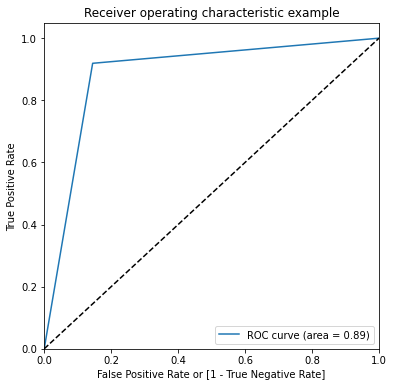

(array([0.        , 0.14469936, 1.        ]),
 array([0.        , 0.91910508, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [588]:
plot_roc(y_train_df.churn, y_train_df.final_predicted)

In [589]:

#plot_roc(y_pred_final.Churn, y_pred_final.predicted)
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.churn, y_train_df.final_predicted)))

roc_auc_score : 0.89


Optimal Cutoff Point<br>
Since recall or sensitivity is a much more important metrics for churn prediction. A trade off between sensitivity(or recall) and specificity is to be consideredfor the same . We will try adjusting the probability cut offs which will result into higher sensitivity or recall rate

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.697680  0.991869  0.403491
0.2   0.2  0.779222  0.983531  0.574913
0.3   0.3  0.832695  0.969237  0.696152
0.4   0.4  0.868921  0.948262  0.789580
0.5   0.5  0.887203  0.919105  0.855301
0.6   0.6  0.890906  0.875188  0.906624
0.7   0.7  0.866746  0.790460  0.943032
0.8   0.8  0.799083  0.622508  0.975659
0.9   0.9  0.537133  0.077218  0.997048


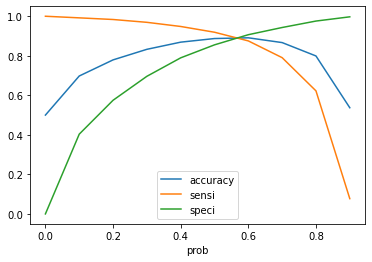

In [590]:
# sensitivity vs specificity trade-off
findOptCut(y_train_df)

From the curve above, 0.45 is the optimum point
cutoff between 0.4 and 0.6 can also be taken but to keep the test sensitivity/recall significant ,here we can take 0.45. At this point there is a balance of sensitivity, specificity and accuracy

In [591]:

# predicting with the choosen cut-off on train
cut_off_prob = 0.45
predChurnWithProbCutOff(logreg,X_train_res[col],y_train_res,cut_off_prob)


Roc_auc_score : 0.8799782484851624
Sensitivity/Recall : 0.9359366098710445
Specificity: 0.8240198870992801
False Positive Rate: 0.17598011290071988
Positive predictive value: 0.8417326502095948
Negative Predictive value: 0.9278633076743643
sklearn precision score value: 0.8417326502095948


,churn,churn_Prob,final_predicted
0,0,0.382823,0
1,0,0.088520,0
2,0,0.429851,0
3,0,0.010154,0
4,0,0.078691,0
...,...,...,...
38613,1,0.900822,1
38614,1,0.801104,1
38615,1,0.297741,0
38616,1,0.748330,1


##### Making prediction on test

In [592]:
# predicting with the choosen cut-off on test
predChurnWithProbCutOff(logreg,X_test[col],y_test,cut_off_prob)

Roc_auc_score : 0.8742524946471134
Sensitivity/Recall : 0.9146666666666666
Specificity: 0.8338383226275603
False Positive Rate: 0.1661616773724397
Positive predictive value: 0.3334953816237239
Negative Predictive value: 0.9907834101382489
sklearn precision score value: 0.3334953816237239


,churn,churn_Prob,final_predicted
6102,1,0.795905,1
2539,1,0.705168,1
21576,0,0.163705,0
19574,0,0.329167,0
12804,1,0.836026,1
...,...,...,...
12109,0,0.221071,0
17866,0,0.046922,0
5658,0,0.008742,0
1434,0,0.204738,0



The resulting model, after logistic regression (with optimal cutoff setting) on the train and test set.<br><br>

train sensitivity : 88.12%, train roc auc score : 80.8% <br>
test sensitivity :0.84%, test roc auc score : 79.18%

### Step 4.2.2 : Decision tree

In [593]:
from sklearn.tree import DecisionTreeClassifier
dt0 = DecisionTreeClassifier(max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=6,
                             random_state=10)
fitModel(dt0, X_train_res, y_train_res)


Model Report
Accuracy : 0.9382
Recall/Sensitivity : 0.9498
AUC Score (Train): 0.977994
CV Score : Mean - 0.9802258 ---- Std - 0.00194712 ---- Min - 0.9771285 ---- Max - 0.98252


In [594]:
# make predictions
pred_probs_test = dt0.predict(X_test)
#Let's check the model metrices.
modelMetrics(actual_churn=y_test,pred_churn=pred_probs_test)

Roc_auc_score : 0.923276936128954
Sensitivity/Recall : 0.916
Specificity: 0.9305538722579081
False Positive Rate: 0.06944612774209187
Positive predictive value: 0.5452380952380952
Negative Predictive value: 0.9918615165999225
sklearn precision score value: 0.5452380952380952


#### Tuning hyperparameters

In [595]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(100, 400, 50),
    'min_samples_split': range(100, 400, 100),
    'max_features': [8,10,15]
}
# Create a based model
dt = DecisionTreeClassifier(class_weight='balanced',random_state=10)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1,scoring="f1_weighted")

In [596]:
# Fit the grid search to the data
grid_search.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   36.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   47.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 648 out of 648 | elapsed:  1.5min finished


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=10),
             n_jobs=4,
             param_grid={'max_depth': range(5, 15, 3),
                         'max_features': [8, 10, 15],
                         'min_samples_leaf': range(100, 400, 50),
                         'min_samples_split': range(100, 400, 100)},
             scoring='f1_weighted', verbose=1)

In [597]:
# printing the optimal accuracy score and hyperparameters
print('recall of',grid_search.best_score_,'using',grid_search.best_params_)

recall of 0.9457411001198088 using {'max_depth': 8, 'max_features': 15, 'min_samples_leaf': 200, 'min_samples_split': 100}


In [598]:
# model with the best hyperparameters
dt_final = DecisionTreeClassifier(max_depth=8,
                             min_samples_leaf=200, 
                             min_samples_split=100,
                             max_features=15,
                             random_state=10)

In [599]:
fitModel(dt_final,X_train_res,y_train_res)


Model Report
Accuracy : 0.9433
Recall/Sensitivity : 0.9516
AUC Score (Train): 0.986521
CV Score : Mean - 0.9850522 ---- Std - 0.00262793 ---- Min - 0.9806114 ---- Max - 0.9883539


In [600]:
# make predictions
pred_probs_test = dt_final.predict(X_test)
#Let's check the model metrices.
modelMetrics(actual_churn=y_test,pred_churn=pred_probs_test)

Roc_auc_score : 0.9169127782491012
Sensitivity/Recall : 0.8946666666666667
Specificity: 0.9391588898315356
False Positive Rate: 0.06084111016846443
Positive predictive value: 0.5720375106564365
Negative Predictive value: 0.9899080224833929
sklearn precision score value: 0.5720375106564365


In [601]:
# classification report
print(classification_report(y_test,pred_probs_test))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      8251
           1       0.57      0.89      0.70       750

    accuracy                           0.94      9001
   macro avg       0.78      0.92      0.83      9001
weighted avg       0.96      0.94      0.94      9001



In [602]:
# predicting churn with default cut-off 0.5
cut_off_prob = 0.5
y_train_df = predChurnWithProbCutOff(dt_final,X_train_res,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.9432647987984878
Sensitivity/Recall : 0.9515769848257289
Specificity: 0.9349526127712465
False Positive Rate: 0.06504738722875343
Positive predictive value: 0.9360163015792154
Negative Predictive value: 0.9507583737097114
sklearn precision score value: 0.9360163015792154


,churn,churn_Prob,final_predicted
0,0,0.941818,1
1,0,0.000000,0
2,0,0.005000,0
3,0,0.260223,0
4,0,0.000000,0


###### Finding cutoff

     prob  accuracy     sensi     speci
0.0   0.0  0.753612  1.000000  0.507225
0.1   0.1  0.919390  0.987053  0.851727
0.2   0.2  0.922653  0.985136  0.860169
0.3   0.3  0.938138  0.970273  0.906002
0.4   0.4  0.942125  0.961210  0.923041
0.5   0.5  0.943265  0.951577  0.934953
0.6   0.6  0.942773  0.944637  0.940908
0.7   0.7  0.934046  0.906676  0.961417
0.8   0.8  0.929567  0.893055  0.966078
0.9   0.9  0.879383  0.770211  0.988555


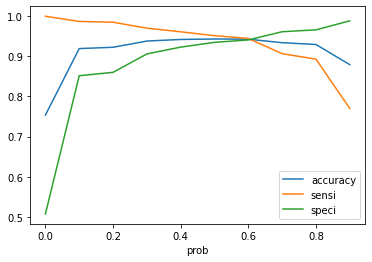

In [603]:
# finding cut-off with the right balance of the metrices
findOptCut(y_train_df)

Taking cutoff as 0.55 as the point is somewhere around 0.6, where all the three metrics, i.e. Accuracy, sensitivity and Specificity are balanced.

In [604]:
# predicting churn with cut-off 0.55
cut_off_prob=0.55
y_train_df = predChurnWithProbCutOff(dt_final,X_train_res,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.9427728002485888
Sensitivity/Recall : 0.9446372158061008
Specificity: 0.9409083846910767
False Positive Rate: 0.0590916153089233
Positive predictive value: 0.9411279087766369
Negative Predictive value: 0.9444300046784841
sklearn precision score value: 0.9411279087766369


,churn,churn_Prob,final_predicted
0,0,0.941818,1
1,0,0.000000,0
2,0,0.005000,0
3,0,0.260223,0
4,0,0.000000,0


###### Predicting on test data

In [605]:
#Test data Results
y_test_df= predChurnWithProbCutOff(dt_final,X_test,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.9098215165838486
Sensitivity/Recall : 0.8746666666666667
Specificity: 0.9449763665010302
False Positive Rate: 0.05502363349896982
Positive predictive value: 0.590990990990991
Negative Predictive value: 0.9880876948422254
sklearn precision score value: 0.590990990990991


,churn,churn_Prob,final_predicted
6102,1,0.844045,1
2539,1,0.997088,1
21576,0,0.019446,0
19574,0,0.008457,0
12804,1,1.000000,1


### Step 4.2.3: Random forest

In [606]:
def f1_plot(score,param):
    scores = score
    # plotting accuracies with max_depth
    plt.figure()
    plt.plot(scores["param_"+param], 
    scores["mean_train_score"], 
    label="training accuracy")
    plt.plot(scores["param_"+param], 
    scores["mean_test_score"], 
    label="test accuracy")
    plt.xlabel(param)
    plt.ylabel("f1")
    plt.legend()
    plt.show()


In [607]:
from sklearn.ensemble import RandomForestClassifier 

rf=RandomForestClassifier(random_state=42,n_estimators=50,oob_score=True)
rf.fit(X_train_res,y_train_res)

RandomForestClassifier(n_estimators=50, oob_score=True, random_state=42)

In [608]:
# Performance on Train set 

y_train_pred=rf.predict(X_train_res)

print(recall_score(y_train_res,y_train_pred))
print(accuracy_score(y_train_res,y_train_pred))

1.0
1.0


In [609]:
# Performance of model on unseen data 

y_test_pred=rf.predict(X_test)
print(accuracy_score(y_test,y_test_pred))
print(recall_score(y_test,y_test_pred))

0.9647816909232307
0.8413333333333334


###### Feature selection

In [610]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       criterion='gini', max_depth=11, max_features=14,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)
rf.fit(X_train_res,y_train_res)

RandomForestClassifier(max_depth=11, max_features=14, min_samples_leaf=20,
                       n_estimators=40, oob_score=True, random_state=42)

In [611]:
rf.feature_importances_

array([6.80636893e-04, 8.16465996e-04, 1.24259627e-02, 8.90789939e-04,
       4.83641603e-04, 3.14517442e-03, 4.23724512e-04, 9.01083646e-04,
       1.49361966e-03, 7.99063932e-04, 5.33078318e-03, 1.96845987e-02,
       8.18404415e-04, 6.51411027e-03, 1.87757848e-02, 4.32221366e-04,
       7.43472812e-04, 6.48828284e-03, 3.11126491e-04, 2.06625141e-03,
       1.06021956e-02, 2.87113819e-04, 3.21943760e-04, 2.54320511e-04,
       9.27176310e-05, 8.15987479e-04, 1.78437253e-04, 5.42543768e-04,
       6.95551745e-04, 3.23238582e-03, 2.24786821e-03, 1.21926079e-03,
       1.29462923e-03, 3.22855749e-03, 1.56022302e-03, 3.88112433e-03,
       1.34868618e-04, 1.58598680e-04, 5.00459520e-05, 1.69020938e-03,
       2.40444789e-03, 7.04194884e-03, 3.65113530e-04, 2.57317479e-04,
       3.28661281e-04, 5.21239282e-04, 2.19684107e-03, 6.54262474e-04,
       6.24838846e-04, 1.85028422e-06, 0.00000000e+00, 1.05310295e-03,
       2.27245251e-03, 1.20302498e-02, 4.09536768e-04, 9.51983576e-04,
      

In [612]:
imp_df=pd.DataFrame({ 
                     "Varname":X_train.columns, 
                     "Importance": rf.feature_importances_})

In [613]:
imp_df.sort_values(by='Importance',ascending=False)

,Varname,Importance
170,totMonRecharge9,0.206285
158,avgRechAmt9,0.168871
162,totalRechNumData9,0.064762
154,dataMbVol9,0.033682
65,loc_ic_mou_8,0.031573
98,max_rech_amt_8,0.031201
80,total_ic_mou_8,0.030566
179,totRoamMou_8,0.028000
166,totalRechAmtData9,0.026498
59,loc_ic_t2m_mou_8,0.022555


In [614]:
#Drop features which are not important
drop_features=imp_df.loc[imp_df['Importance'] >0]
drop_features['Varname'].to_list()

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_6',
 'loc

In [615]:
# Building the random forests with just the variables that have importance >0 . 

imp_col=drop_features['Varname'].to_list() 
imp_col

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_6',
 'loc

In [616]:
rf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       criterion='gini', max_depth=11, max_features=14,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)
rf.fit(X_train_res[imp_col],y_train_res)

RandomForestClassifier(max_depth=11, max_features=14, min_samples_leaf=20,
                       n_estimators=40, oob_score=True, random_state=42)

##### Tuning Max_depth

In [617]:
#Tuning Max depth
parameters = {'max_depth': range(10, 30, 5)}
rf0 = RandomForestClassifier()
rfgs = GridSearchCV(rf0, parameters, 
                    cv=5, 
                   scoring="f1",return_train_score=True)
rfgs.fit(X_train_res[imp_col],y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(10, 30, 5)},
             return_train_score=True, scoring='f1')

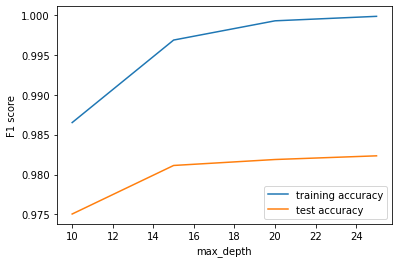

In [618]:
scores = rfgs.cv_results_
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("F1 score")
plt.legend()
plt.show()

f1 score is constant after 20, max depth=20

###### Tuning n_estimators

In [619]:
#Tuning n estimator
parameters = {'n_estimators': range(50, 150, 25)}
rf1 = RandomForestClassifier(max_depth=20,random_state=10)
rfgs = GridSearchCV(rf1, parameters, 
                    cv=3, 
                   scoring="recall",return_train_score=True)

In [620]:
rfgs.fit(X_train_res[imp_col],y_train_res)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=20, random_state=10),
             param_grid={'n_estimators': range(50, 150, 25)},
             return_train_score=True, scoring='recall')

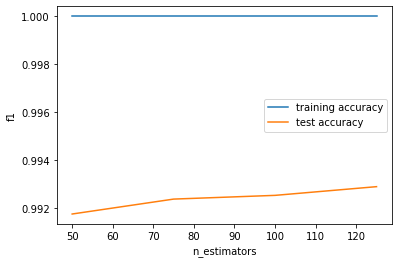

In [621]:
f1_plot(rfgs.cv_results_,'n_estimators')

Select n_estimator = 75

###### Tuning Max_Features

In [622]:
#Tunong Max features
parameters = {'max_features': [4, 8, 14]}
rf3 = RandomForestClassifier(max_depth=20,n_estimators=75,random_state=10)
rfgs = GridSearchCV(rf3, parameters, 
                    cv=3, 
                   scoring="f1",return_train_score=True)

In [623]:
rfgs.fit(X_train_res[imp_col],y_train_res) 

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=20, n_estimators=75,
                                              random_state=10),
             param_grid={'max_features': [4, 8, 14]}, return_train_score=True,
             scoring='f1')

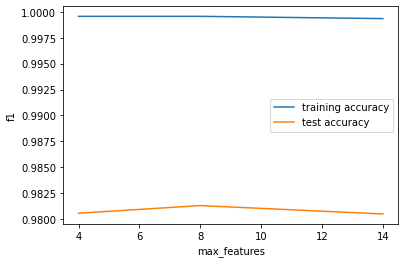

In [624]:
f1_plot(rfgs.cv_results_,'max_features')

Selecting max features=3

###### Tuning Min_samples_leaf

In [625]:
#Tuning Sample leaf
parameters = {'min_samples_leaf': range(100, 400, 50)}
rf4 = RandomForestClassifier(max_depth=20,n_estimators=75,max_features=3,random_state=10)
rfgs = GridSearchCV(rf4, parameters, 
                    cv=3, 
                   scoring="f1",return_train_score=True)

In [626]:
rfgs.fit(X_train_res[imp_col],y_train_res)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=20, max_features=3,
                                              n_estimators=75,
                                              random_state=10),
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='f1')

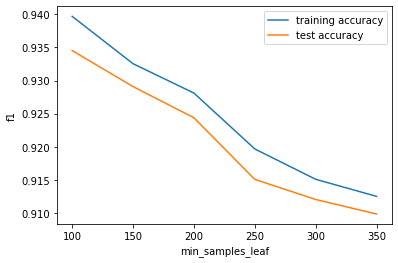

In [627]:
f1_plot(rfgs.cv_results_,'min_samples_leaf')

Minimum sample leaf = 100

###### Tuning min_samples_split

In [628]:
#Tuning Min sample split
parameters = {'min_samples_split': range(150, 300, 50)}
rf5 = RandomForestClassifier(max_depth=20,n_estimators=75,max_features=3,min_samples_leaf=100,random_state=10)
rfgs = GridSearchCV(rf5, parameters, 
                    cv=3, 
                   scoring="f1",return_train_score=True)

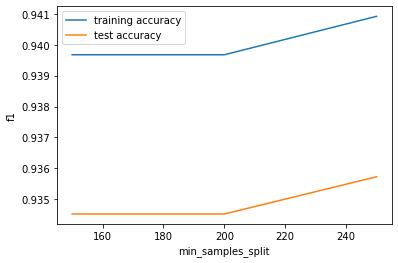

In [629]:
rfgs.fit(X_train_res[imp_col],y_train_res)
f1_plot(rfgs.cv_results_,'min_samples_split')

Min sample split is taken as 150

###### Tuned Random forest

In [630]:
#Tuned Random forest
rf_final = RandomForestClassifier(max_depth=20,
                                  n_estimators=75,
                                  max_features=3,
                                  min_samples_leaf=100,
                                  min_samples_split=50,
                                  random_state=10)

In [631]:
print("Train data Results:")
fitModel(rf_final,X_train_res[imp_col],y_train_res)

Train data Results:

Model Report
Accuracy : 0.9459
Recall/Sensitivity : 0.9527
AUC Score (Train): 0.988062
CV Score : Mean - 0.9844813 ---- Std - 0.00138821 ---- Min - 0.9823117 ---- Max - 0.9863262


In [632]:
# predict on test data
predictions = rf_final.predict(X_test[imp_col])

In [633]:
print("Test data Results:")
modelMetrics(y_test,predictions)

Test data Results:
Roc_auc_score : 0.8913974871732719
Sensitivity/Recall : 0.8413333333333334
Specificity: 0.9414616410132105
False Positive Rate: 0.05853835898678948
Positive predictive value: 0.566427289048474
Negative Predictive value: 0.9849118803093698
sklearn precision score value: 0.566427289048474


In [634]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df = predChurnWithProbCutOff(rf_final,X_train_res[imp_col],y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.9459319488321508
Sensitivity/Recall : 0.952716349888653
Specificity: 0.9391475477756487
False Positive Rate: 0.06085245222435134
Positive predictive value: 0.9399621889530427
Negative Predictive value: 0.9520659421431197
sklearn precision score value: 0.9399621889530427


,churn,churn_Prob,final_predicted
0,0,0.530993,1
1,0,0.092237,0
2,0,0.332866,0
3,0,0.170716,0
4,0,0.044546,0


###### Finding Cutoff with right balance of metrices

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.654306  1.000000  0.308613
0.2   0.2  0.828241  1.000000  0.656481
0.3   0.3  0.912010  0.998602  0.825418
0.4   0.4  0.942773  0.989021  0.896525
0.5   0.5  0.945932  0.952716  0.939148
0.6   0.6  0.921203  0.876275  0.966130
0.7   0.7  0.874877  0.764566  0.985188
0.8   0.8  0.796934  0.596613  0.997255
0.9   0.9  0.689135  0.378787  0.999482


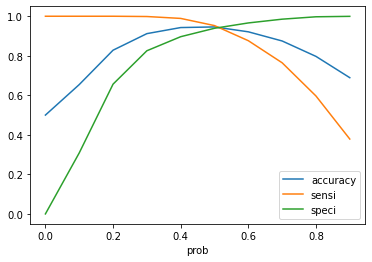

In [635]:
# finding cut-off with the right balance of the metrices
findOptCut(y_train_df)

Choosing cutoff as 0.45 from the graph. Here Accuracy,Sensitivity and specificity are balanced.

In [636]:
cut_off_prob=0.45
predChurnWithProbCutOff(rf_final,X_train_res[imp_col],y_train_res,cut_off_prob)

Roc_auc_score : 0.9481588896369568
Sensitivity/Recall : 0.9759179657154695
Specificity: 0.9203998135584442
False Positive Rate: 0.07960018644155575
Positive predictive value: 0.9245866247976056
Negative Predictive value: 0.9745023852607336
sklearn precision score value: 0.9245866247976056


,churn,churn_Prob,final_predicted
0,0,0.530993,1
1,0,0.092237,0
2,0,0.332866,0
3,0,0.170716,0
4,0,0.044546,0
...,...,...,...
38613,1,0.969553,1
38614,1,0.838148,1
38615,1,0.570176,1
38616,1,0.679452,1


##### Making prediction on test

In [637]:
#Making prediction on test
y_test_df= predChurnWithProbCutOff(rf_final,X_test[imp_col],y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.9035803336969257
Sensitivity/Recall : 0.8826666666666667
Specificity: 0.9244940007271846
False Positive Rate: 0.07550599927281541
Positive predictive value: 0.5151750972762645
Negative Predictive value: 0.9885951270088128
sklearn precision score value: 0.5151750972762645


,churn,churn_Prob,final_predicted
6102,1,0.542427,1
2539,1,0.720939,1
21576,0,0.258526,0
19574,0,0.200029,0
12804,1,0.845094,1


## Step7: Model Selection

### Step 7.1 Selecting Best Model

#### Let's understand evaluation Metrics for all the three models:

<table style="width:90%">
<tr>
<th>Algorithm</th>
<th>Metric</th>
<th>Train</th>
<th>Test</th>
</tr>
    
<tr>
<td>Logistic Regression</td>
</tr>
    
<tr>
<td></td>
<td>Roc_auc_score</td>
<td>87.99%</td>
<td>87.42%</td>
</tr>
    
<tr>
<td></td>
<td>Sensitivity/Recall </td>
<td>93.59%</td>
<td> 91.46%</td>
</tr>
    
<tr>
<td></td>
<td>Specificity</td>
<td> 82.40%</td>
<td>83.38%</td>
</tr>

<tr>
<td>Decision Tree</td>
</tr>

<tr>
<td></td>
<td>Roc_auc_score</td>
<td>94.27</td>
<td>90.98</td>
</tr>
    
<tr>
<td></td>
<td>Sensitivity/Recall </td>
<td>94.46</td>
<td>87.46</td>
</tr>
    
<tr>
<td></td>
<td>Specificity</td>
<td>94.09</td>
<td>94.49</td>
</tr>
    
<tr>
<td>Random Forest</td>
</tr>
    
<tr>
<td></td>
<td>Roc_auc_score</td>
<td>94.81%</td>
<td>90.35%</td>
</tr>
    
<tr>
<td></td>
<td>Sensitivity/Recall </td>
<td>97.59%</td>
<td>88.26%</td>
</tr>
    
<tr>
<td></td>
<td>Specificity</td>
<td>92.03%</td>
<td>92.4%</td>
</tr>
    
</table>


By looking into the evaluation Metric table, Overall, the **Logistic Regression model** with probability performs best. 
- It achieved the best recall accuracy of 91.46% for test data. 
- Also the overall accuracy and specificity is consistent for Test and train data which says, it's avoiding overfitting.
The precision is compromised but the business objective to predict Churn customers is captured accurately.

### Step 7.2 Important churn features


<table>
    <tr><th>Top 10 Important Churn Features</th></tr>
    <tr><td>totalRechNumData9 - Total Number of data recharges</td></tr>
    <tr><td>avgRechAmt9 - Average recharge amount of month -9</td></tr>
    <tr><td>total_ic_mou_8 - Total incoming call usage in month August</td></tr>
    <tr><td>avgRechAmt6 - Average recharge amount of June mont</td></tr>
    <tr><td>totRoamMou_8 - Total roaming in month of August</td></tr>
    <tr><td>isd_ic_mou_8 - ISD incoming call of August month</td></tr>
    <tr><td>total_rech_num_8 - Total number of recharge in month of AUgust</td></tr>
    <tr><td>spl_ic_mou_8 - Special incoming call of month 8</td></tr>
    <tr><td>spl_ic_mou_6 - Special incoming call of month 6</td></tr>
    <tr><td>std_ic_mou_6 - std incoming call of month -6</td></tr>
</table>

<br><br>
These are the top 10 features which are affecting Churn. Recharge amount, Data, Total number of recharge for data are playing important role in determing churners

## Step8 : Conclusion

Customer retention has become more important as cost of aquiring new customer is too high.

- Customer churn can be predicted by Usage based churn, which gives good accuracy.
- Telecom company must pay attention to MOU for all the months
- Telecom company must also pay attention to data usage monthwise
- Churners show higher roaming usage than non churners. Telecom company may offer discounts or may reduce tarrif on Roaming calls. 
- Network operator must ensure quality of data service provided
- Telecom company may also look at competitors tarrif plans for roaming calls and data
- Special incoming and outgoing call offers should be continued
